In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (90, 40)

----

# Загрузка данных

In [6]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/my_ds_piscine/train_sber.csv')
df_train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [7]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/my_ds_piscine/test.csv')
df_test.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,30474,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,...,8,0,0,0,1,10,1,0,14,1
1,30475,2015-07-01,79.2,NaN,8,17,1,0.0,3,1.0,...,4,1,1,0,2,11,0,1,12,1
2,30476,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,...,42,11,4,0,10,21,0,10,71,11
3,30477,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,...,1,1,2,0,0,10,0,0,2,0
4,30478,2015-07-01,40.0,40.0,17,17,1,0.0,1,1.0,...,5,1,1,0,2,12,0,1,11,1


In [ ]:
df_train.shape

(30471, 292)

In [ ]:
df_test.shape

(7662, 291)

----

# Очистка данных

----

## Обработка отсутствующих значений

----

### Общие сведения о выборках

Создадим таблицу для заполнения результатами очистки

In [8]:
columns = ['Признак', 'Количество пропущенных значений', 'Количество ошибочных значений', 
           'Количество выбросов', 'Управление', 'Комментарий']
data_cleanup_table = pd.DataFrame(columns=columns)
data_cleanup_table.Признак = df_train.columns
data_cleanup_table.head()

,Признак,Количество пропущенных значений,Количество ошибочных значений,Количество выбросов,Управление,Комментарий
0,id,NaN,NaN,NaN,NaN,NaN
1,timestamp,NaN,NaN,NaN,NaN,NaN
2,full_sq,NaN,NaN,NaN,NaN,NaN
3,life_sq,NaN,NaN,NaN,NaN,NaN
4,floor,NaN,NaN,NaN,NaN,NaN


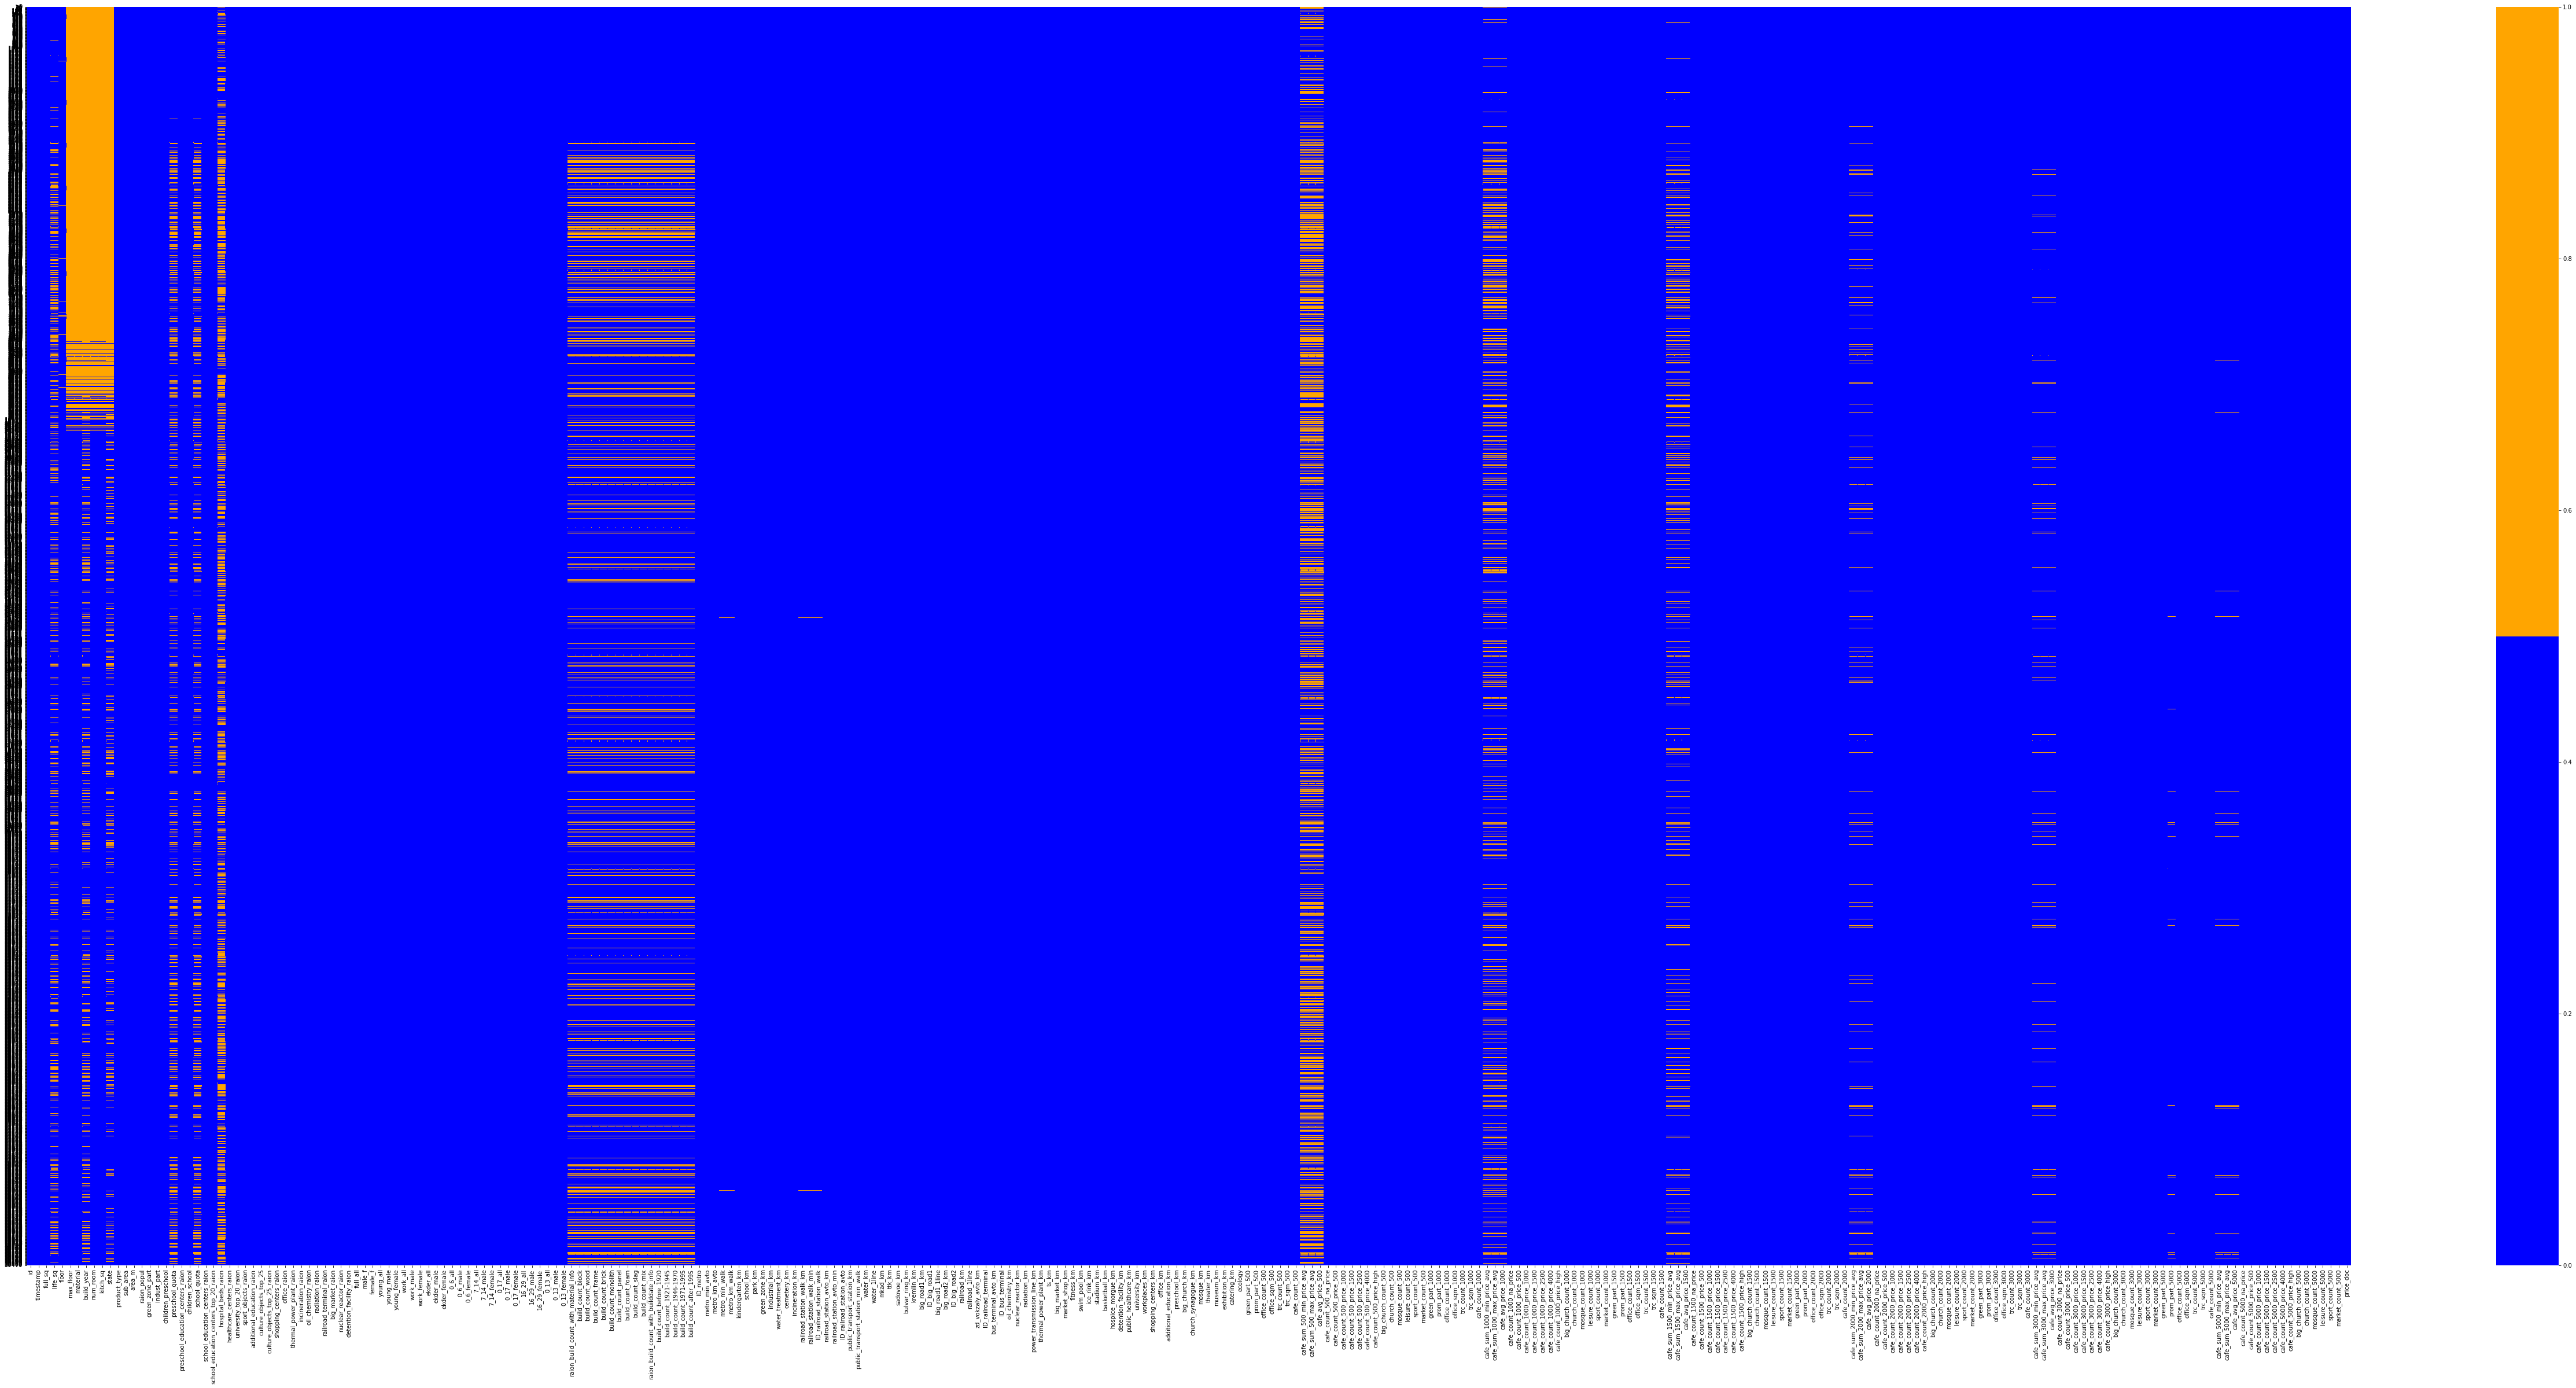

In [ ]:
sns.heatmap(df_train.isna(), cmap=sns.color_palette(['blue','orange']), yticklabels=10)
plt.show()

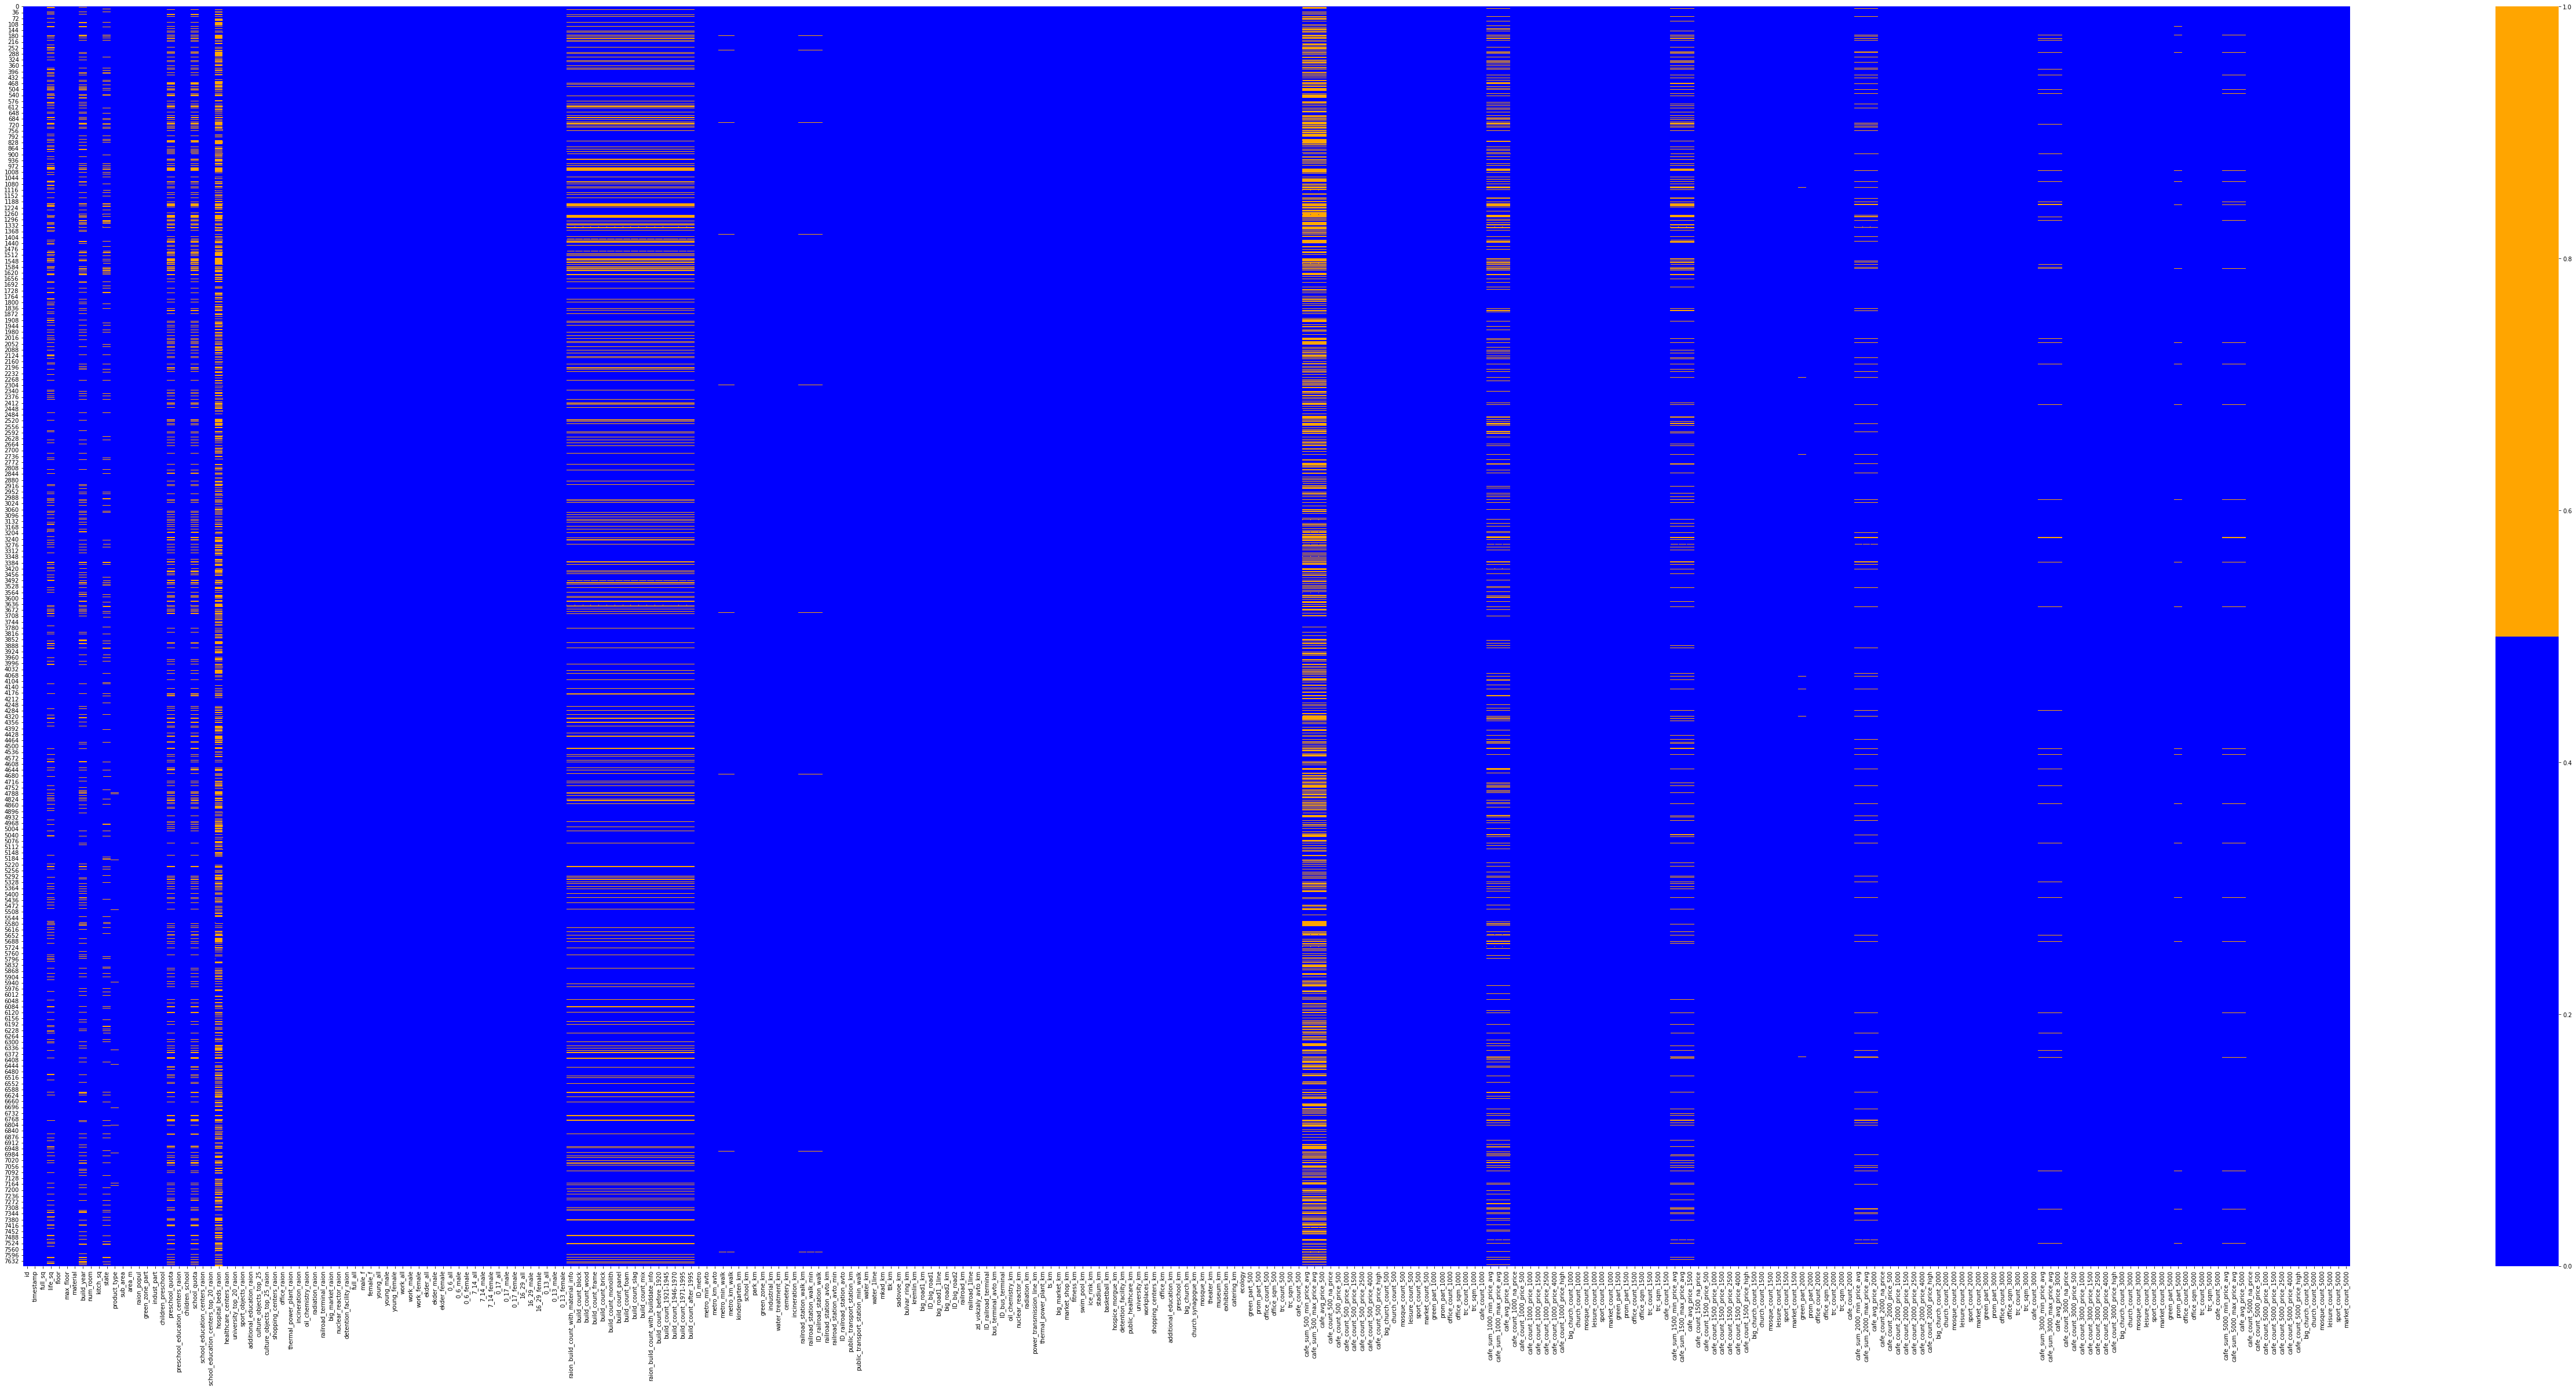

In [ ]:
sns.heatmap(df_test.isna(), cmap=sns.color_palette(['blue','orange']))
plt.show()

In [ ]:
pylab.rcParams['figure.figsize'] = (15, 10)

def plot_bar_missing_data(df, n_selection = 0):
    """Построение гистограммы пропущенных данных.
       df - анализируемый датафрейм
       n_selection - номер выборки: обучающая - 0, тестовая - 1"""
    dfT = df.T.isna().sum()
    dft = pd.DataFrame()
    dft['Количество пропущенных значений в наблюдении'] = [j for j in range(dfT.max() + 1)]
    dft['Количество наблюдений'] = [len(dfT[dfT == j]) for j in range(dfT.max() + 1)]
    sns.barplot(x = 'Количество пропущенных значений в наблюдении', y = 'Количество наблюдений', data = dft)
    title = ['Обучающая выборка', 'Тестовая выборка']
    plt.title(title[n_selection])
    plt.show()

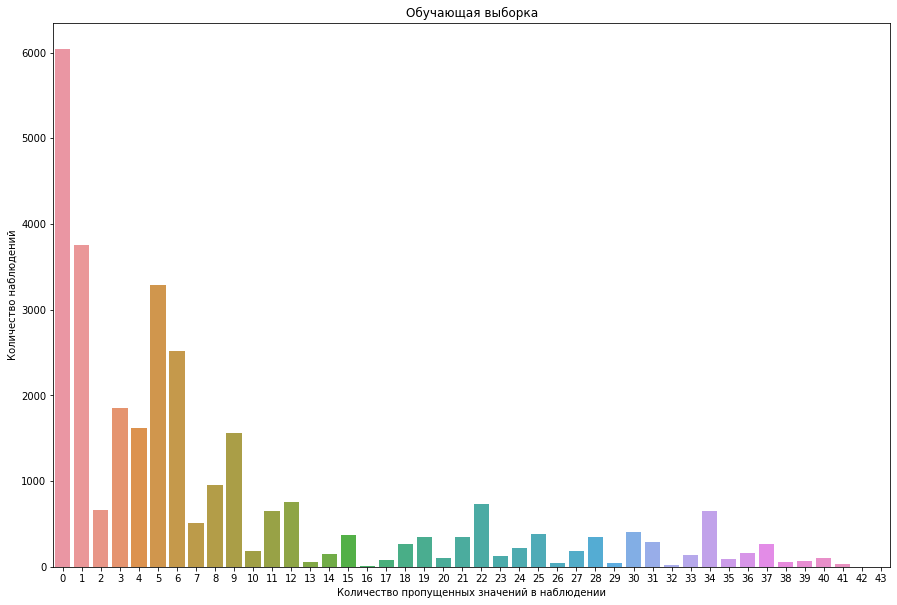

In [ ]:
plot_bar_missing_data(df_train, 0)

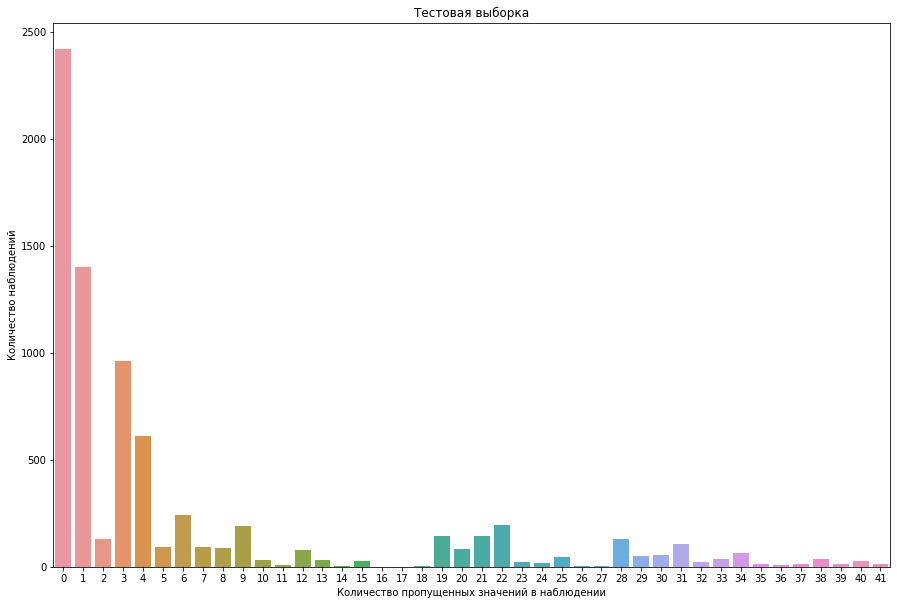

In [ ]:
plot_bar_missing_data(df_test, 1)

Заполним таблицу результатов данными о пропусках

In [9]:
data_cleanup_table['Количество пропущенных значений'] = [sum(df_train[i].isna()) for i in df_train.columns]
data_cleanup_table

,Признак,Количество пропущенных значений,Количество ошибочных значений,Количество выбросов,Управление,Комментарий
0,id,0,NaN,NaN,NaN,NaN
1,timestamp,0,NaN,NaN,NaN,NaN
2,full_sq,0,NaN,NaN,NaN,NaN
3,life_sq,6383,NaN,NaN,NaN,NaN
4,floor,167,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
287,mosque_count_5000,0,NaN,NaN,NaN,NaN
288,leisure_count_5000,0,NaN,NaN,NaN,NaN
289,sport_count_5000,0,NaN,NaN,NaN,NaN
290,market_count_5000,0,NaN,NaN,NaN,NaN


----

### Информация о среднем чеке в кафе

В тестовых и обучающих выборках часто отсутствует информация о кафе поблизости. 

- cafe_sum_500_min_price_avg	Cafes and restaurant min average bill in 500 meters zone
- cafe_sum_500_max_price_avg	Cafes and restaurant max average bill in 500 meters zone
- cafe_avg_price_500	Cafes and restaurant average bill in 500 meters zone
- cafe_sum_1000_min_price_avg	Cafes and restaurant min average bill in 1000 meters zone
- cafe_sum_1000_max_price_avg	Cafes and restaurant max average bill in 1000 meters zone
- cafe_avg_price_1000	Cafes and restaurant average bill in 1000 meters zone
- cafe_sum_1500_min_price_avg	Cafes and restaurant min average bill in 1500 meters zone
- cafe_sum_1500_max_price_avg	Cafes and restaurant max average bill in 1500 meters zone
- cafe_avg_price_1500	Cafes and restaurant average bill in 1500 meters zone
- cafe_sum_2000_min_price_avg	Cafes and restaurant min average bill in 2000 meters zone
- cafe_sum_2000_max_price_avg	Cafes and restaurant max average bill in 2000 meters zone
- cafe_avg_price_2000	Cafes and restaurant average bill in 2000 meters zone
- cafe_sum_3000_min_price_avg	Cafes and restaurant min average bill in 3000 meters zone
- cafe_sum_3000_max_price_avg	Cafes and restaurant max average bill in 3000 meters zone
- cafe_avg_price_3000	Cafes and restaurant average bill in 3000 meters zone
- cafe_sum_5000_min_price_avg	Cafes and restaurant min average bill in 5000 meters zone
- cafe_sum_5000_max_price_avg	Cafes and restaurant max average bill in 5000 meters zone
- cafe_avg_price_5000	Cafes and restaurant average bill in 5000 meters zone

In [10]:
clean1 = ['cafe_sum_500_min_price_avg',
          'cafe_sum_500_max_price_avg',
          'cafe_avg_price_500',
          'cafe_sum_1000_min_price_avg',
          'cafe_sum_1000_max_price_avg',
          'cafe_avg_price_1000',
          'cafe_sum_1500_min_price_avg',
          'cafe_sum_1500_max_price_avg',
          'cafe_avg_price_1500',
          'cafe_sum_2000_min_price_avg',
          'cafe_sum_2000_max_price_avg',
          'cafe_avg_price_2000',
          'cafe_sum_3000_min_price_avg',
          'cafe_sum_3000_max_price_avg',
          'cafe_avg_price_3000',
          'cafe_sum_5000_min_price_avg',
          'cafe_sum_5000_max_price_avg',
          'cafe_avg_price_5000']

for attribute in clean1:
  data_cleanup_table.loc[data_cleanup_table['Признак'] == attribute, 'Управление'] = 'удалить'
  data_cleanup_table.loc[data_cleanup_table['Признак'] == attribute, 'Комментарий'] = 'Данные о среднем чеке в кафе напрямую \
зависят от тех же факторов, что и цена недвижимости, а также от самой цены недвижимости, поэтому данный фактор является \
малоинформативным. В данных признаках в тестовой и обучающей выборках очень много пропусков'

data_cleanup_table[data_cleanup_table['Признак'] == 'cafe_sum_500_min_price_avg']

,Признак,Количество пропущенных значений,Количество ошибочных значений,Количество выбросов,Управление,Комментарий
160,cafe_sum_500_min_price_avg,13281,NaN,NaN,удалить,Данные о среднем чеке в кафе напрямую зависят ...


In [11]:
df_train_clean = df_train.drop(clean1, axis=1)
df_train_clean

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,15,5,0,15,26,1,2,84,6,7400000
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,313,128,24,98,182,1,82,171,15,25000000
30468,30471,2015-06-30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,...,1,1,0,2,12,0,1,11,1,6970959
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,22,1,1,6,31,1,4,65,7,13500000


In [12]:
df_test_clean = df_test.drop(clean1, axis=1)

----

### Информация о зданиях в районе

Рассмотрим признаки, связанные с качеством домов в округе (год постройки, материалы)

- raion_build_count_with_material_info	Number of building with material info in district
- build_count_block	Share of block buildings
- build_count_wood	Share of wood buildings
- build_count_frame	Share of frame buildings
- build_count_brick	Share of brick buildings
- build_count_monolith	Share of monolith buildings
- build_count_panel	Share of panel buildings
- build_count_foam	Share of foam buildings
- build_count_slag	Share of slag buildings
- build_count_mix	Share of mixed buildings
- raion_build_count_with_builddate_info	Number of building with build year info in district
- build_count_before_1920	Share of before_1920 buildings
- build_count_1921-1945	Share of 1921-1945 buildings
- build_count_1946-1970	Share of 1946-1970 buildings
- build_count_1971-1995	Share of 1971-1995 buildings
- build_count_after_1995	Share of after_1995 buildings

In [13]:
raion_buildings = ['raion_build_count_with_material_info',
                   'build_count_block',
                   'build_count_wood',
                   'build_count_frame',
                   'build_count_brick',
                   'build_count_monolith',
                   'build_count_panel',
                   'build_count_foam',
                   'build_count_slag',
                   'build_count_mix',
                   'raion_build_count_with_builddate_info',
                   'build_count_before_1920',
                   'build_count_1921-1945',
                   'build_count_1946-1970',
                   'build_count_1971-1995',
                   'build_count_after_1995']

print(df_train[raion_buildings].info())
print(df_test[raion_buildings].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   raion_build_count_with_material_info   25480 non-null  float64
 1   build_count_block                      25480 non-null  float64
 2   build_count_wood                       25480 non-null  float64
 3   build_count_frame                      25480 non-null  float64
 4   build_count_brick                      25480 non-null  float64
 5   build_count_monolith                   25480 non-null  float64
 6   build_count_panel                      25480 non-null  float64
 7   build_count_foam                       25480 non-null  float64
 8   build_count_slag                       25480 non-null  float64
 9   build_count_mix                        25480 non-null  float64
 10  raion_build_count_with_builddate_info  25480 non-null  float64
 11  bu

----

#### Обучающий набор

- sub_area: name of the district

In [ ]:
df_train['sub_area'].value_counts()

Poselenie Sosenskoe               1776
Nekrasovka                        1611
Poselenie Vnukovskoe              1372
Poselenie Moskovskij               925
Poselenie Voskresenskoe            713
                                  ... 
Molzhaninovskoe                      3
Poselenie Shhapovskoe                2
Poselenie Kievskij                   2
Poselenie Klenovskoe                 1
Poselenie Mihajlovo-Jarcevskoe       1
Name: sub_area, Length: 146, dtype: int64

In [ ]:
missing_buildings_info = pd.DataFrame({district : df_train.loc[df_train['sub_area'] == district, raion_buildings].isna().sum() for district in df_train['sub_area'].unique()}, index=raion_buildings)

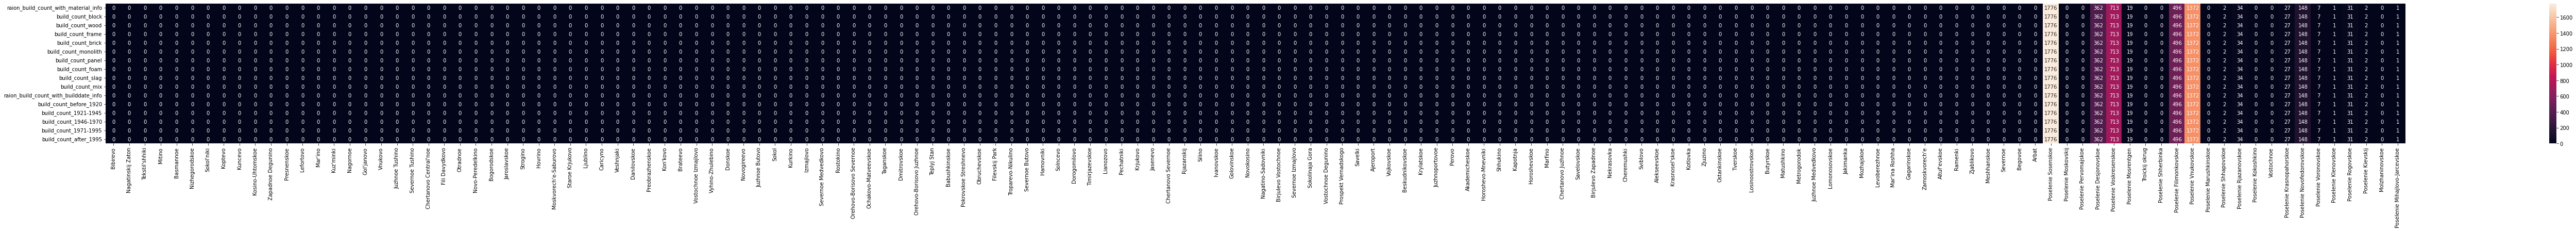

In [ ]:
pylab.rcParams['figure.figsize'] = (100, 5)

sns.heatmap(missing_buildings_info, annot=True, fmt="d")
plt.show()

О зданиях в следующих районах отсутствует информация в некоторых полях

In [ ]:
high_missing_buildings_info = missing_buildings_info.iloc[0][missing_buildings_info.iloc[0] > 0]
high_missing_buildings_info

Poselenie Sosenskoe               1776
Poselenie Desjonovskoe             362
Poselenie Voskresenskoe            713
Poselenie Mosrentgen                19
Poselenie Filimonkovskoe           496
Poselenie Vnukovskoe              1372
Poselenie Shhapovskoe                2
Poselenie Rjazanovskoe              34
Poselenie Krasnopahorskoe           27
Poselenie Novofedorovskoe          148
Poselenie Voronovskoe                7
Poselenie Klenovskoe                 1
Poselenie Rogovskoe                 31
Poselenie Kievskij                   2
Poselenie Mihajlovo-Jarcevskoe       1
Name: raion_build_count_with_material_info, dtype: int64

In [ ]:
df_train['sub_area'].value_counts().loc[high_missing_buildings_info.index]

Poselenie Sosenskoe               1776
Poselenie Desjonovskoe             362
Poselenie Voskresenskoe            713
Poselenie Mosrentgen                19
Poselenie Filimonkovskoe           496
Poselenie Vnukovskoe              1372
Poselenie Shhapovskoe                2
Poselenie Rjazanovskoe              34
Poselenie Krasnopahorskoe           27
Poselenie Novofedorovskoe          148
Poselenie Voronovskoe                7
Poselenie Klenovskoe                 1
Poselenie Rogovskoe                 31
Poselenie Kievskij                   2
Poselenie Mihajlovo-Jarcevskoe       1
Name: sub_area, dtype: int64

In [ ]:
df_train['sub_area'].value_counts().loc[high_missing_buildings_info.index] - high_missing_buildings_info

Poselenie Sosenskoe               0
Poselenie Desjonovskoe            0
Poselenie Voskresenskoe           0
Poselenie Mosrentgen              0
Poselenie Filimonkovskoe          0
Poselenie Vnukovskoe              0
Poselenie Shhapovskoe             0
Poselenie Rjazanovskoe            0
Poselenie Krasnopahorskoe         0
Poselenie Novofedorovskoe         0
Poselenie Voronovskoe             0
Poselenie Klenovskoe              0
Poselenie Rogovskoe               0
Poselenie Kievskij                0
Poselenie Mihajlovo-Jarcevskoe    0
dtype: int64

Оказывается, для полученных районов полностью отсутствует информация о зданиях

----

#### Тестовый набор

Посмотрим на тестовый набор:

In [ ]:
missing_buildings_info_test = pd.DataFrame({district : df_test.loc[df_test['sub_area'] == district, raion_buildings].isna().sum() for district in df_test['sub_area'].unique()}, index=raion_buildings)

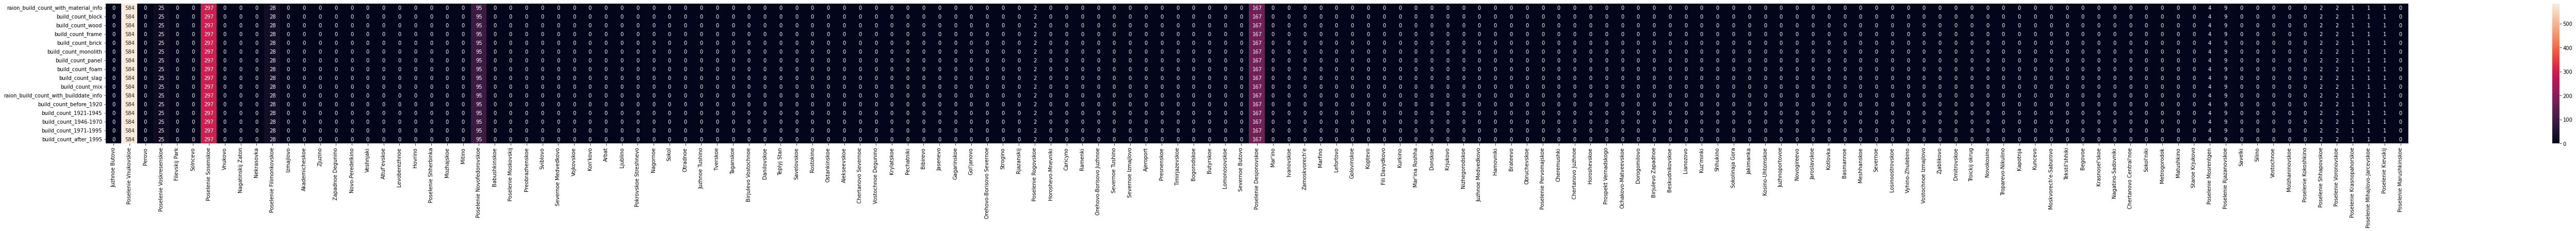

In [ ]:
pylab.rcParams['figure.figsize'] = (100, 5)

sns.heatmap(missing_buildings_info_test, annot=True, fmt="d")
plt.show()

In [ ]:
high_missing_buildings_info_test = missing_buildings_info_test.iloc[0][missing_buildings_info_test.iloc[0] > 0]
high_missing_buildings_info_test

Poselenie Vnukovskoe              584
Poselenie Voskresenskoe            25
Poselenie Sosenskoe               297
Poselenie Filimonkovskoe           28
Poselenie Novofedorovskoe          95
Poselenie Rogovskoe                 2
Poselenie Desjonovskoe            167
Poselenie Mosrentgen                4
Poselenie Rjazanovskoe              9
Poselenie Shhapovskoe               2
Poselenie Voronovskoe               2
Poselenie Krasnopahorskoe           1
Poselenie Mihajlovo-Jarcevskoe      1
Poselenie Kievskij                  1
Name: raion_build_count_with_material_info, dtype: int64

In [ ]:
df_test['sub_area'].value_counts().loc[high_missing_buildings_info_test.index] - high_missing_buildings_info_test

Poselenie Vnukovskoe              0
Poselenie Voskresenskoe           0
Poselenie Sosenskoe               0
Poselenie Filimonkovskoe          0
Poselenie Novofedorovskoe         0
Poselenie Rogovskoe               0
Poselenie Desjonovskoe            0
Poselenie Mosrentgen              0
Poselenie Rjazanovskoe            0
Poselenie Shhapovskoe             0
Poselenie Voronovskoe             0
Poselenie Krasnopahorskoe         0
Poselenie Mihajlovo-Jarcevskoe    0
Poselenie Kievskij                0
dtype: int64

In [ ]:
for district in high_missing_buildings_info_test.index:
  if district not in high_missing_buildings_info.index:
    print(district)

В тестовом наборе информация о зданиях отсутствует в тех же районах, что и в обучающем

In [ ]:
for district in df_test['sub_area'].unique():
  if district not in df_train['sub_area'].unique():
    print(district)

Новых районов в тестовых данных нет

----

#### Общая информация

Пропуски в данных связаны лишь с отсутствием информации об отдельных районах. Можно посмотреть на карте близость данных районов к другим и заполнить информацию в соответствии с ними

Посмотрим, совпадает ли информация о зданиях вокруг для покупок в районах с ненулевой информацией

In [ ]:
df_train[df_train['sub_area'] == 'Nekrasovka'][raion_buildings].mean()

raion_build_count_with_material_info     43.0
build_count_block                         3.0
build_count_wood                          0.0
build_count_frame                         0.0
build_count_brick                        10.0
build_count_monolith                      2.0
build_count_panel                        28.0
build_count_foam                          0.0
build_count_slag                          0.0
build_count_mix                           0.0
raion_build_count_with_builddate_info    41.0
build_count_before_1920                   0.0
build_count_1921-1945                     1.0
build_count_1946-1970                     7.0
build_count_1971-1995                    10.0
build_count_after_1995                   23.0
dtype: float64

In [ ]:
buildings_info_std = df_train.groupby(by=['sub_area'])[raion_buildings].std()
buildings_info_std

,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995
sub_area,,,,,,,,,,,,,,,,
Ajeroport,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Akademicheskoe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alekseevskoe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Altuf'evskoe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arbat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vyhino-Zhulebino,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zamoskvorech'e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zapadnoe Degunino,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Если информация для каждой продажи в районе будет одинаковой, то все эти признаки можно смело удалять. Признаки дублируются признаком sub_area. По тому, в каком районе ведется продажа, понятно какие дома в этом районе. Эти признаки могут могут быть представлены как элитность района, которую позже можно вычислить из распределения цен на обучающей выборке

In [ ]:
buildings_info_std.any().any()

False

In [ ]:
# Для примера:
# для строки с единицей метод вернет True
(pd.Series([0, 1, 0, 0, 0])).any()

True

In [14]:
clean2 = raion_buildings

for attribute in clean2:
  data_cleanup_table.loc[data_cleanup_table['Признак'] == attribute, 'Управление'] = 'удалить'
  data_cleanup_table.loc[data_cleanup_table['Признак'] == attribute, 'Комментарий'] = 'Данные о зданиях в \
  окрестностях одинаковы для всех покупок в районе. Признак sub_area агрегирует все эти разрозненные данные в полноценный \
  информативный признак. Если людям нравятся здания в районе, им в целом нравится район. Позже составим топ районов и этот \
  признак заменит удаленные'

data_cleanup_table[data_cleanup_table['Признак'] == 'raion_build_count_with_material_info']

,Признак,Количество пропущенных значений,Количество ошибочных значений,Количество выбросов,Управление,Комментарий
68,raion_build_count_with_material_info,4991,NaN,NaN,удалить,Данные о зданиях в окрестностях одинаковы дл...


In [15]:
df_train_clean.drop(clean2, axis=1, inplace=True)
df_train_clean

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,15,5,0,15,26,1,2,84,6,7400000
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,313,128,24,98,182,1,82,171,15,25000000
30468,30471,2015-06-30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,...,1,1,0,2,12,0,1,11,1,6970959
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,22,1,1,6,31,1,4,65,7,13500000


In [16]:
df_test_clean.drop(clean2, axis=1, inplace=True)

----

### Информация о районе

Лучше было бы представить информацию о районах в виде рейтинга стоимости недвижимости в этих районах

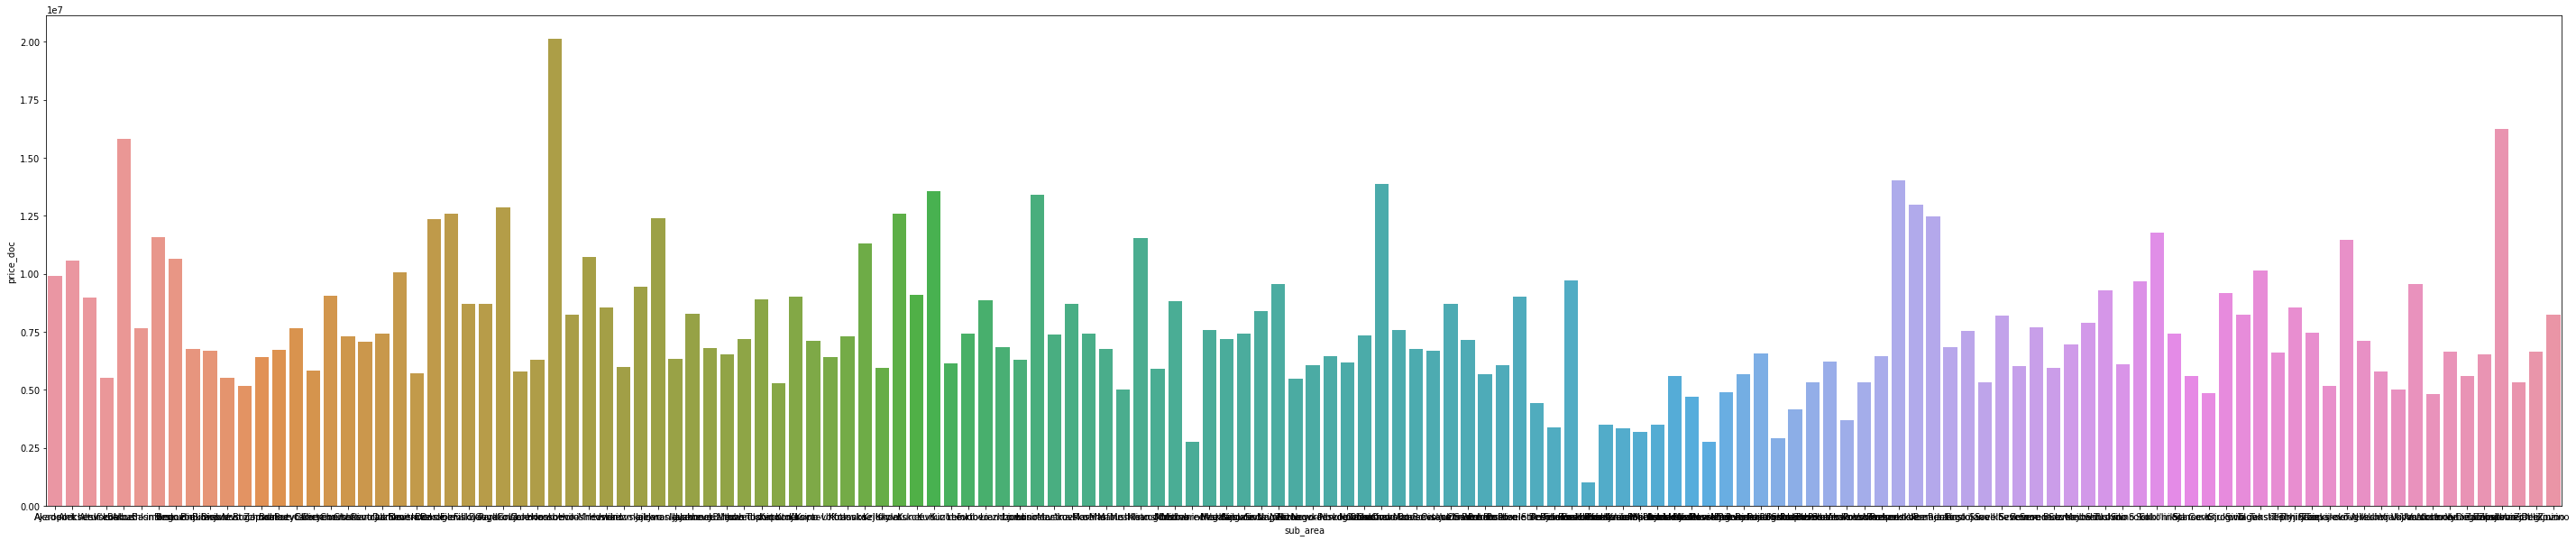

In [ ]:
pylab.rcParams['figure.figsize'] = (50, 10)

mean_district_price = df_train.groupby(by=['sub_area'])['price_doc'].mean()
sns.barplot(x=mean_district_price.index, y=mean_district_price)
plt.show()

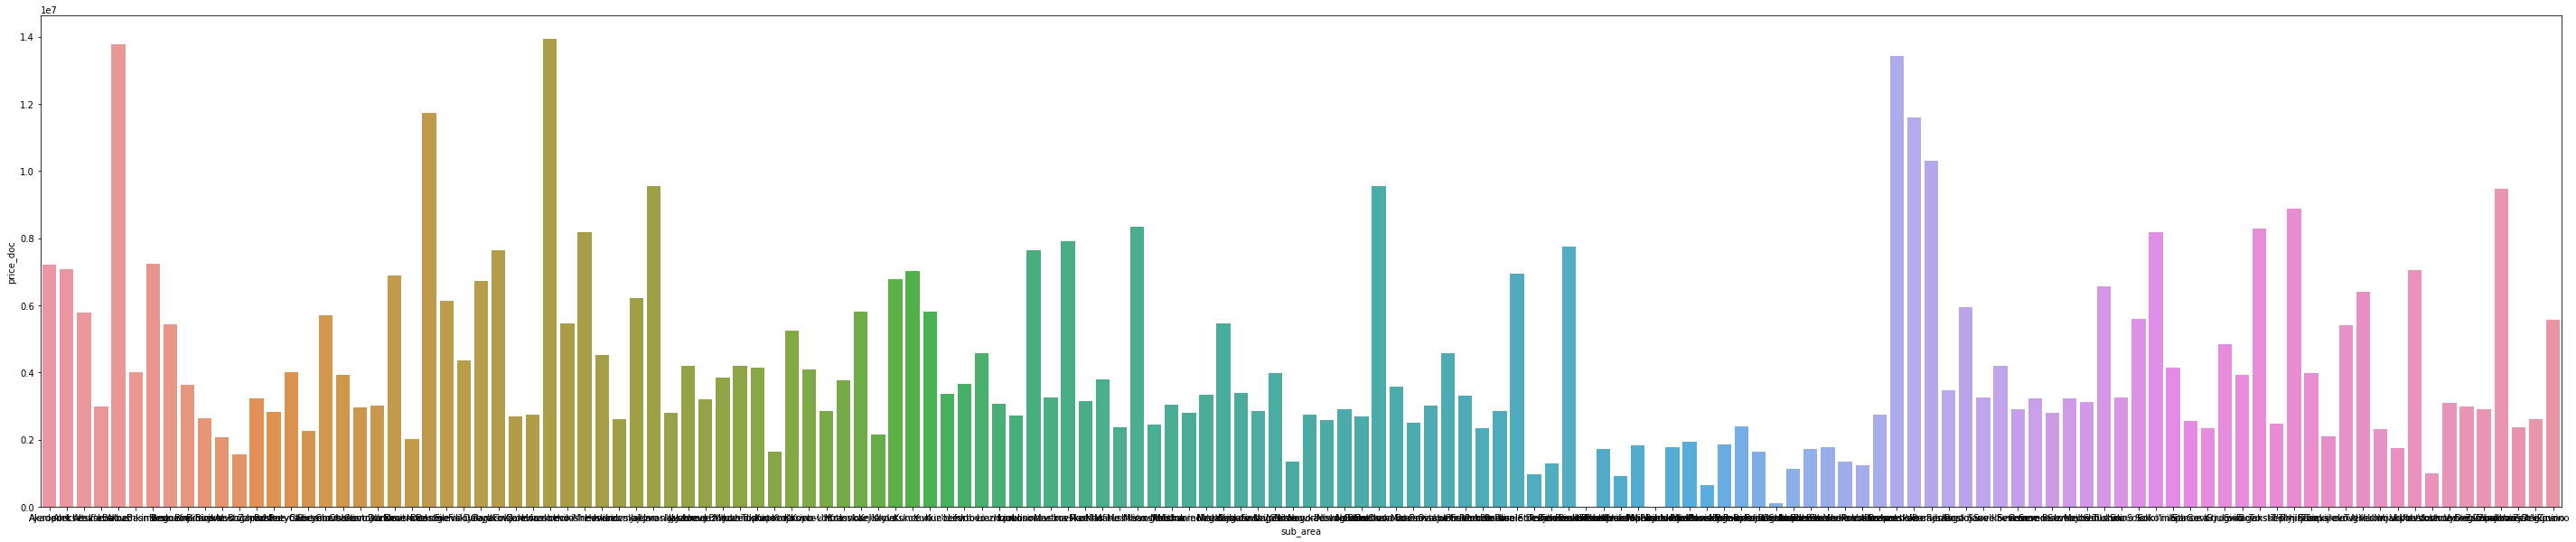

In [ ]:
pylab.rcParams['figure.figsize'] = (50, 10)

std_district_price = df_train.groupby(by=['sub_area'])['price_doc'].std()
sns.barplot(x=std_district_price.index, y=std_district_price)
plt.show()

Было бы неплохо построить boxplot для каждого района и определить выбросы, но получится слишком много графиков, требующих длительного анализа. Вместо этого построим график сравнения максимального значения для района и 95% перцентиль.

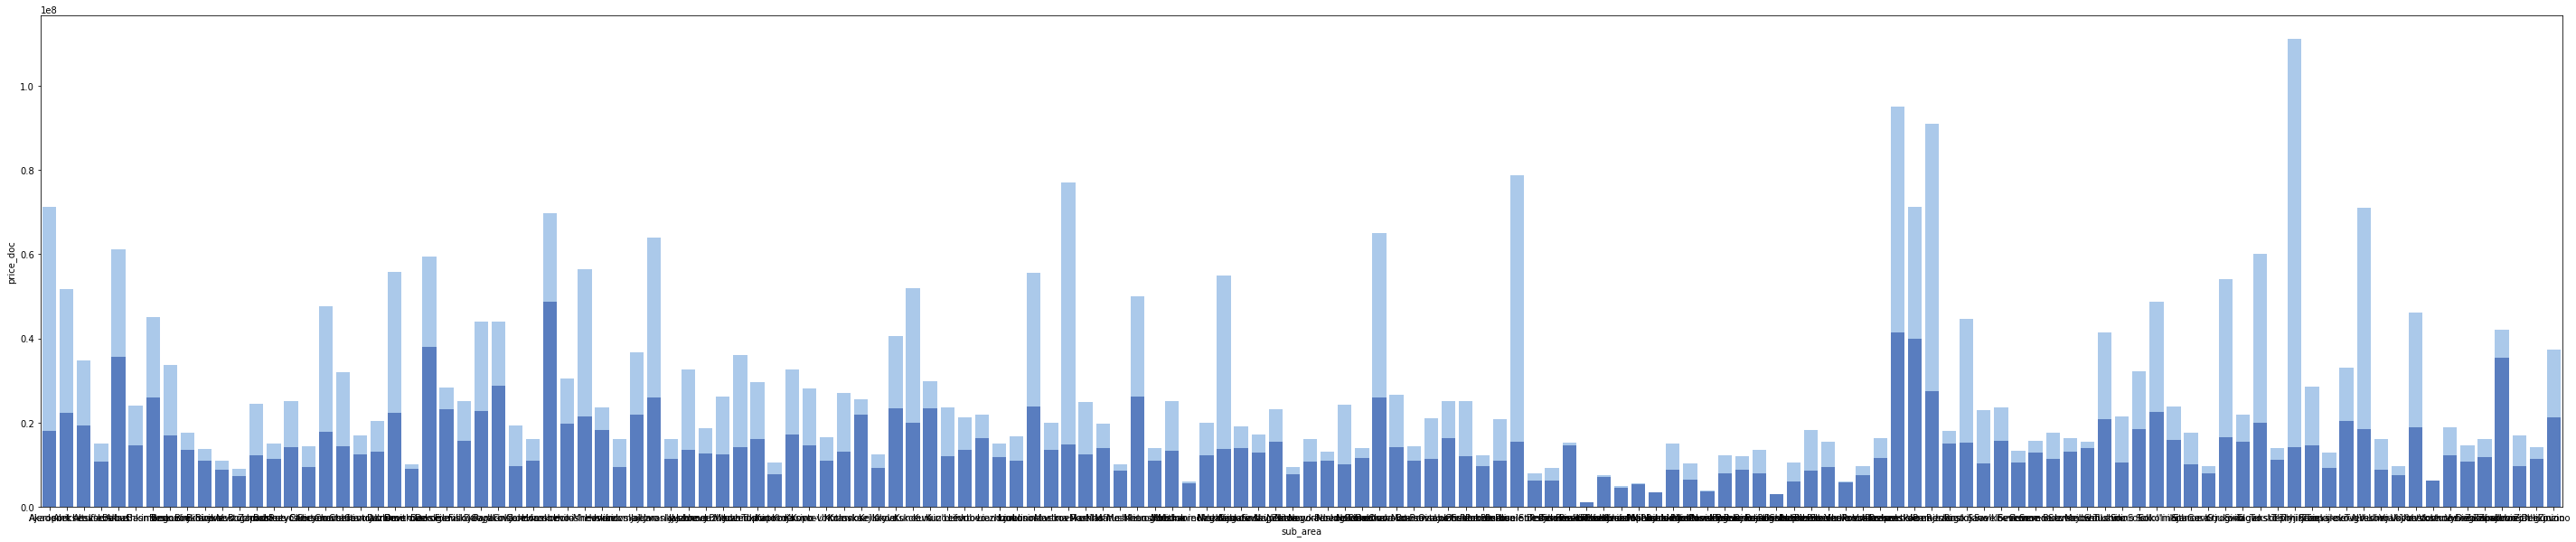

In [ ]:
pylab.rcParams['figure.figsize'] = (50, 10)

max_district_price = df_train.groupby(by=['sub_area'])['price_doc'].max()
per_district_price = df_train.groupby(by=['sub_area'])['price_doc'].quantile(.95)

sns.set_color_codes("pastel")
sns.barplot(x=max_district_price.index, y=max_district_price, color='b')
sns.set_color_codes("muted")
sns.barplot(x=per_district_price.index, y=per_district_price, color='b')
plt.show()

Будем считать максимальное значение выбросом, если значение превышает 95% перцентиль больше чем на 3 стандартных отклонения. Будем собирать количество удаленных строк для внесения в таблицу сведений о выбросах по признаку sub_area. Производить удаления будем до тех пор, пока max не будет расположен достаточно близко к 95%

In [ ]:
count_to_delete = 0

for district in df_train['sub_area'].unique():
  group = df_train[df_train['sub_area'] == district][['price_doc']]
  max = group.max()['price_doc']
  std = group.std()['price_doc']
  per = group.quantile(.95)['price_doc']
  # print(max)
  while (max - 3 * std) > (per):
    count_to_delete += 1
    idx = group[group['price_doc'] == max].index
    group.drop(idx, inplace=True)
    idx = df_train[(df_train['sub_area'] == district) & (df_train['price_doc'] == max)].index
    df_train_clean.drop(idx, axis=0, inplace=True)
    max = group.max()['price_doc']
    std = group.std()['price_doc']
    per = group.quantile(.95)['price_doc']

count_to_delete #108

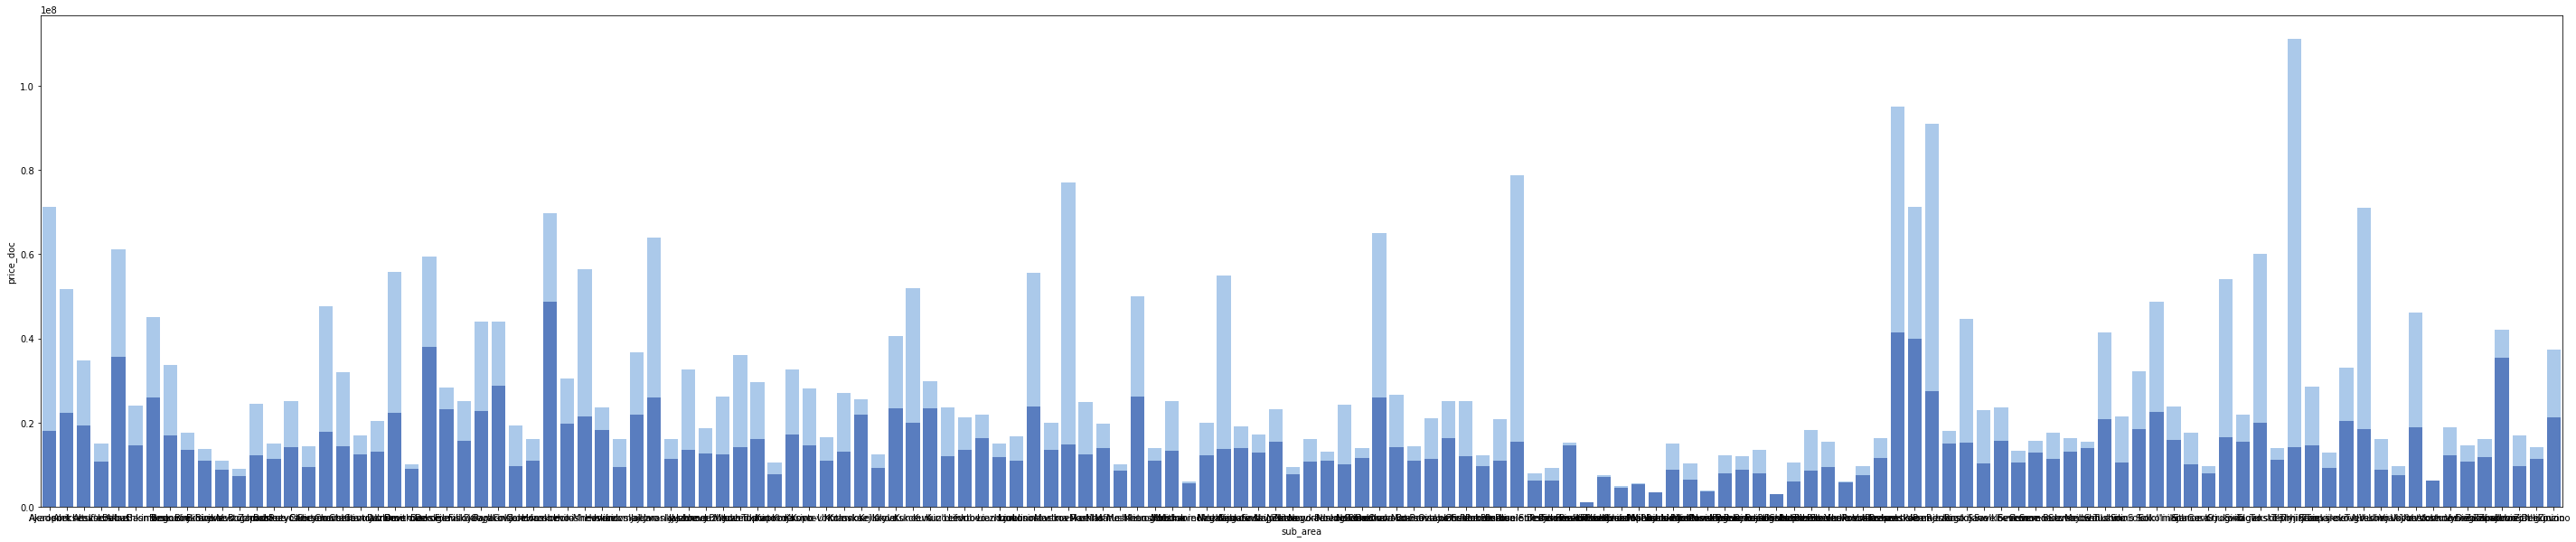

In [ ]:
pylab.rcParams['figure.figsize'] = (50, 10)

max_district_price = df_train.groupby(by=['sub_area'])['price_doc'].max()
per_district_price = df_train.groupby(by=['sub_area'])['price_doc'].quantile(.95)

sns.set_color_codes("pastel")
sns.barplot(x=max_district_price.index, y=max_district_price, color='b')
sns.set_color_codes("muted")
sns.barplot(x=per_district_price.index, y=per_district_price, color='b')
plt.show()

Одно стандартное отклонение

In [17]:
for district in df_train_clean['sub_area'].unique():
  group = df_train_clean[df_train_clean['sub_area'] == district][['price_doc']]
  max = group.max()['price_doc']
  std = group.std()['price_doc']
  per = group.quantile(.95)['price_doc']
  while (max - 1 * std) > (per):
    count_to_delete += 1
    idx = group[group['price_doc'] == max].index
    group.drop(idx, inplace=True)
    idx = df_train_clean[(df_train_clean['sub_area'] == district) & (df_train_clean['price_doc'] == max)].index
    df_train_clean.drop(idx, axis=0, inplace=True)
    max = group.max()['price_doc']
    std = group.std()['price_doc']
    per = group.quantile(.95)['price_doc']

count_to_delete

711

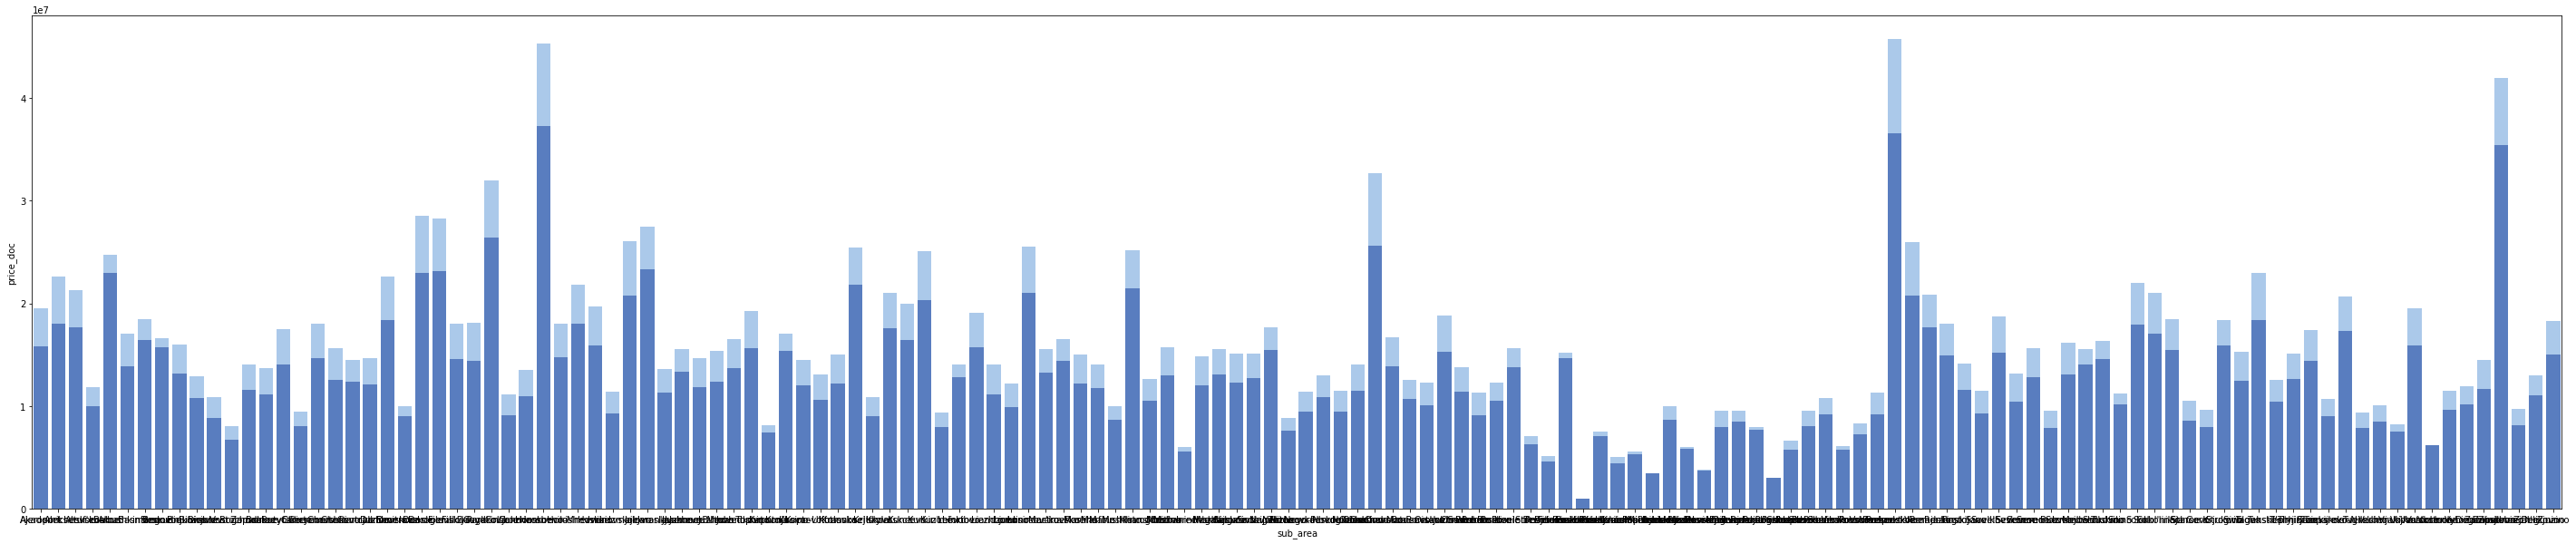

In [18]:
pylab.rcParams['figure.figsize'] = (50, 10)

max_district_price = df_train_clean.groupby(by=['sub_area'])['price_doc'].max()
per_district_price = df_train_clean.groupby(by=['sub_area'])['price_doc'].quantile(.95)

sns.set_color_codes("pastel")
sns.barplot(x=max_district_price.index, y=max_district_price, color='b')
sns.set_color_codes("muted")
sns.barplot(x=per_district_price.index, y=per_district_price, color='b')
plt.show()

In [19]:
data_cleanup_table.loc[data_cleanup_table['Признак'] == 'sub_area', 'Количество выбросов'] = count_to_delete
data_cleanup_table.loc[data_cleanup_table['Признак'] == 'sub_area', 'Управление'] = 'Заменим наименования рейтингом'
data_cleanup_table.loc[data_cleanup_table['Признак'] == 'sub_area', 'Комментарий'] = 'Максимальные значения стоимости были слишком далеко от 95%'

data_cleanup_table.loc[data_cleanup_table['Признак'] == 'sub_area']

,Признак,Количество пропущенных значений,Количество ошибочных значений,Количество выбросов,Управление,Комментарий
12,sub_area,0,NaN,711,Заменим наименования рейтингом,Максимальные значения стоимости были слишком д...


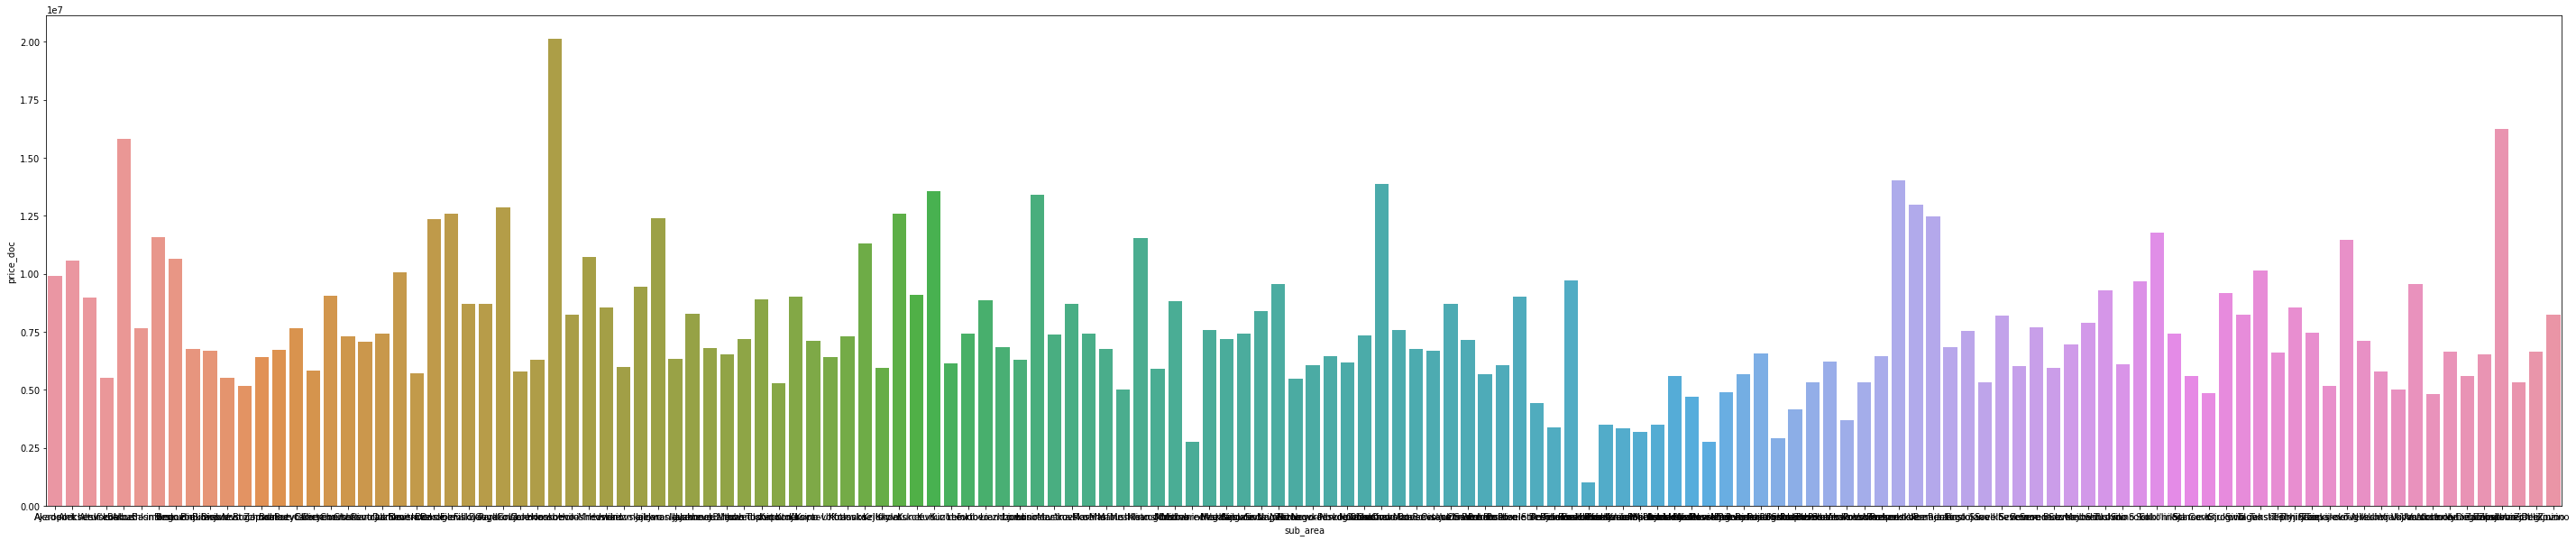

In [21]:
pylab.rcParams['figure.figsize'] = (50, 10)

mean_district_price = df_train.groupby(by=['sub_area'])['price_doc'].mean()
sns.barplot(x=mean_district_price.index, y=mean_district_price)
plt.show()

Разобьем районы на 6 групп

In [22]:
distinct_groups_reverse = {}
rang = mean_district_price.max() / 20

distinct_groups_reverse[0] = mean_district_price[mean_district_price < rang * 4].index.to_list()
distinct_groups_reverse[1] = mean_district_price[(mean_district_price < rang * 6) & (mean_district_price >= rang * 4)].index.to_list()
distinct_groups_reverse[2] = mean_district_price[(mean_district_price < rang * 7) & (mean_district_price >= rang * 6)].index.to_list()
distinct_groups_reverse[3] = mean_district_price[(mean_district_price < rang * 8) & (mean_district_price >= rang * 7)].index.to_list()
distinct_groups_reverse[4] = mean_district_price[(mean_district_price < rang * 10) & (mean_district_price >= rang * 8)].index.to_list()
distinct_groups_reverse[5] = mean_district_price[mean_district_price >= rang * 10].index.to_list()

for i in range(6):
  print(len(distinct_groups_reverse[i]))

10
32
29
23
29
23


In [ ]:
distinct_groups = {}

for i in range(len(distinct_groups_reverse)):
  for j in distinct_groups_reverse[i]:
    distinct_groups[j] = i

distinct_groups

In [24]:
df_train_clean['raion_range'] = [distinct_groups[i] for i in df_train_clean['sub_area']]
df_test_clean['raion_range'] = [distinct_groups[i] for i in df_test_clean['sub_area']]
df_train_clean['raion_range']

0        2
1        4
2        2
3        4
4        5
        ..
30465    3
30466    3
30468    2
30469    5
30470    2
Name: raion_range, Length: 29715, dtype: int64

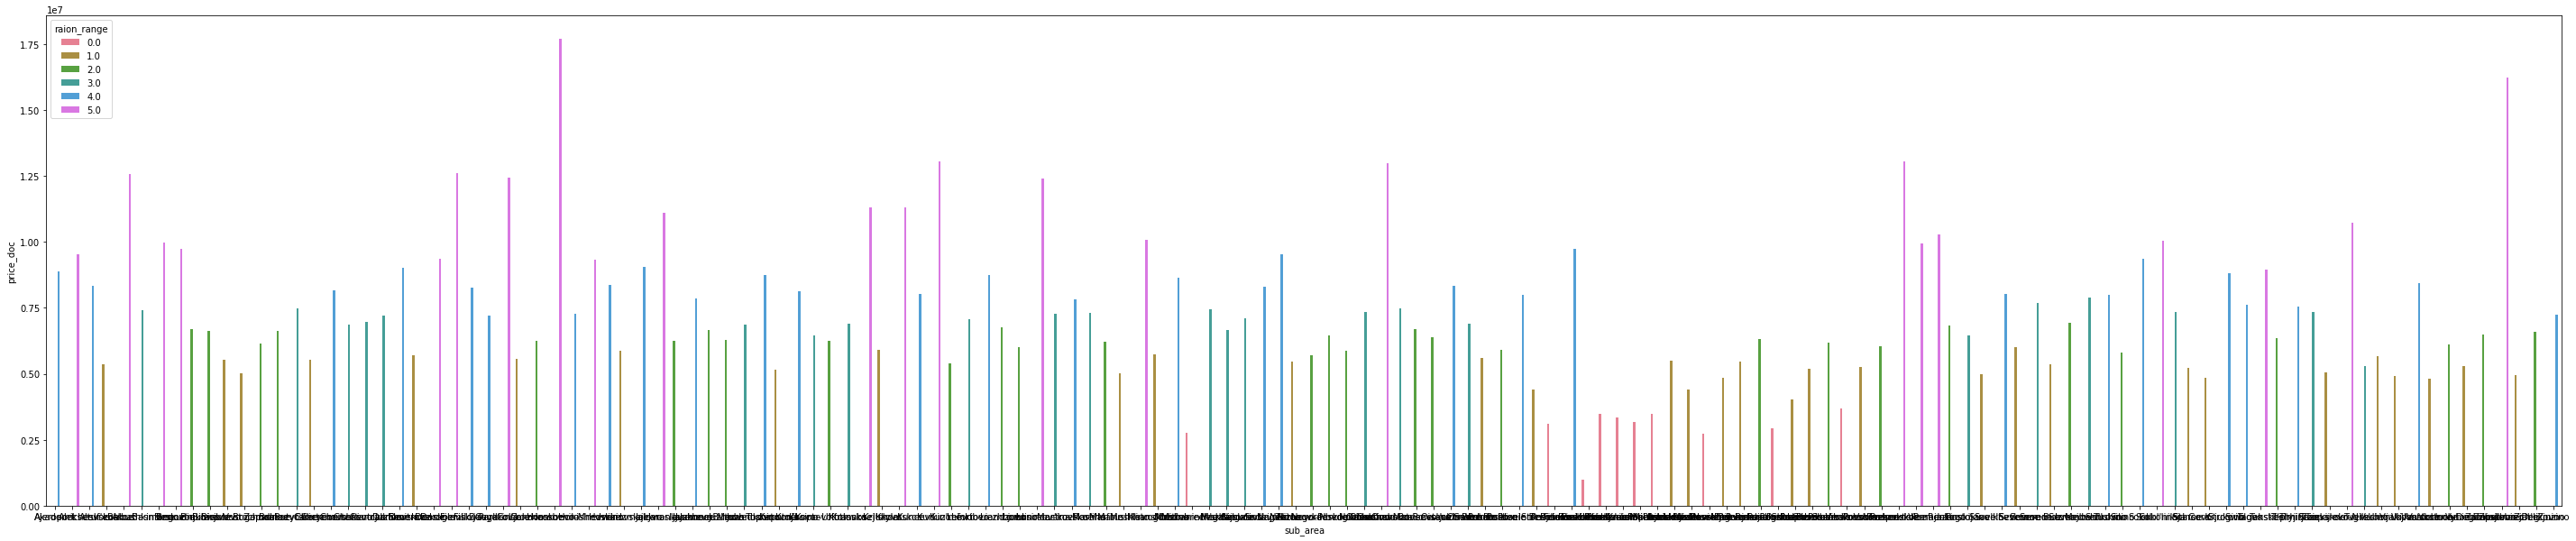

In [25]:
pylab.rcParams['figure.figsize'] = (50, 10)

mean_district_price = df_train_clean.groupby(by=['sub_area'])['price_doc', 'raion_range'].mean()
sns.barplot(x=mean_district_price.index, y=mean_district_price['price_doc'], hue=mean_district_price['raion_range'], palette="husl")
plt.show()

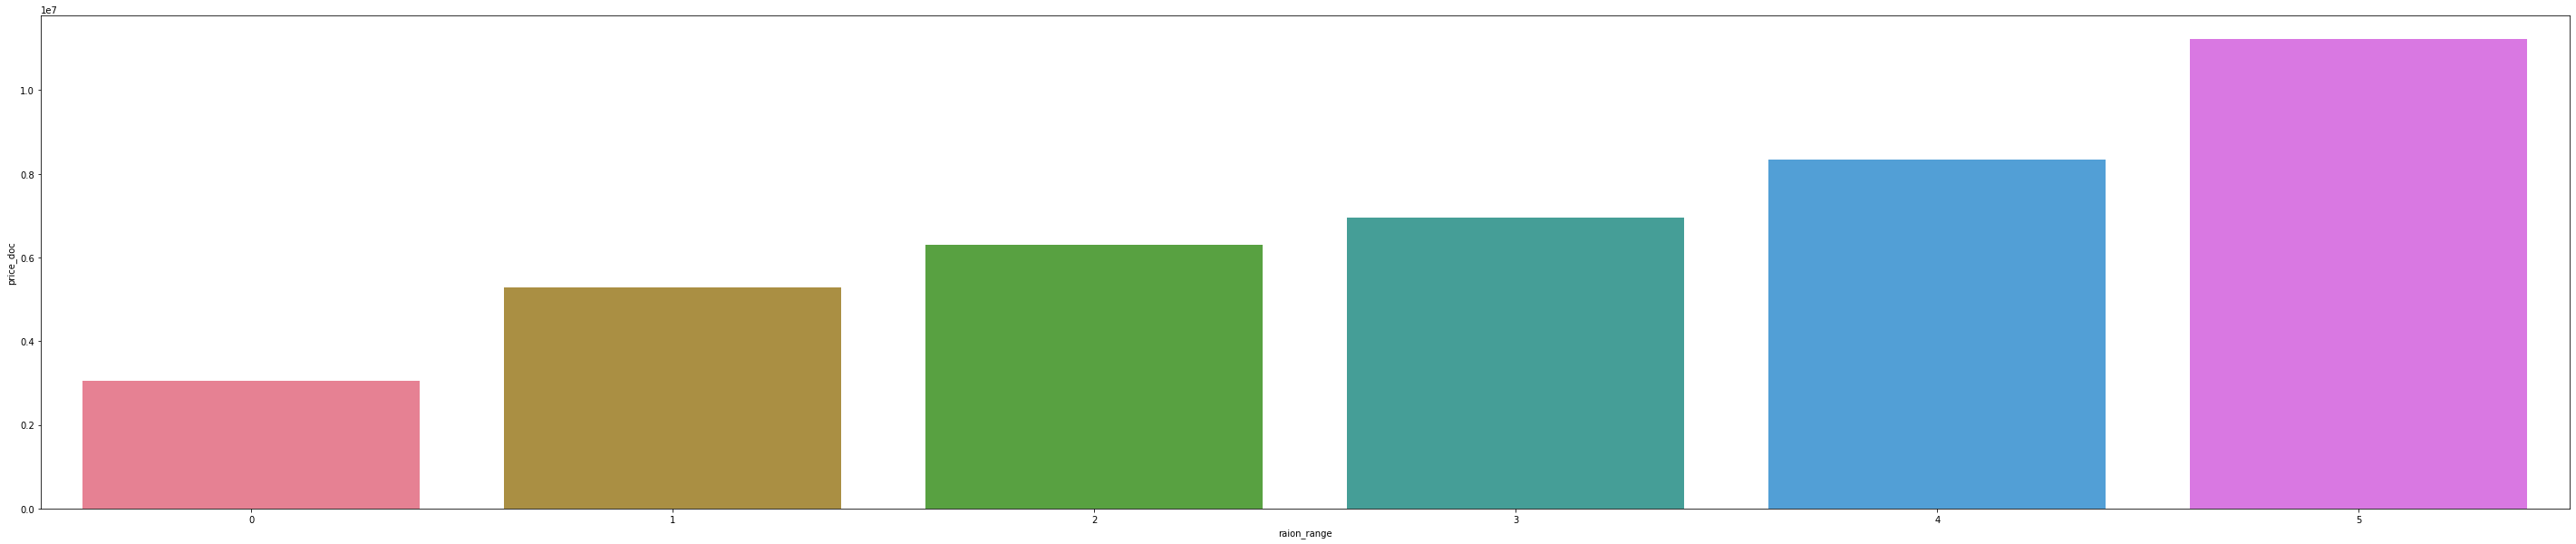

In [26]:
pylab.rcParams['figure.figsize'] = (50, 10)

mean_district_price = df_train_clean.groupby(by=['raion_range'])['price_doc'].mean()
sns.barplot(x=mean_district_price.index, y=mean_district_price, palette="husl")
plt.show()

----

### Информация о типе квартиры

- num_room: number of living rooms

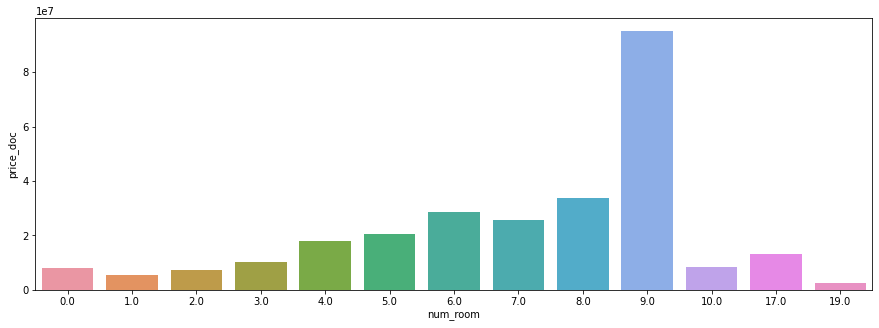

In [29]:
pylab.rcParams['figure.figsize'] = (15, 5)

mean_num_room_price = df_train.groupby(by=['num_room'])['price_doc'].mean()
sns.barplot(x=mean_num_room_price.index, y=mean_num_room_price)
plt.show()

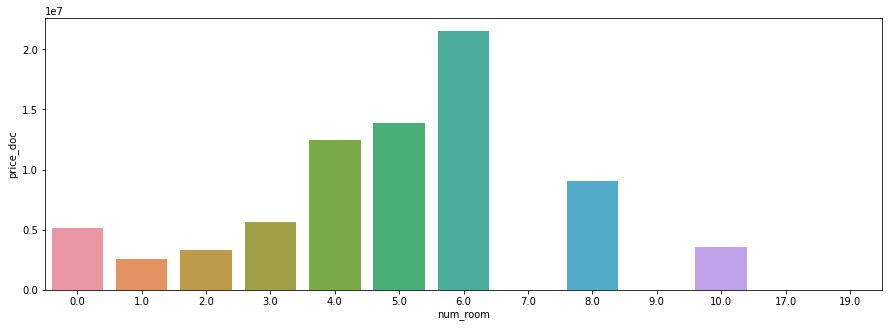

In [300]:
std_num_room_price = df_train.groupby(by=['num_room'])['price_doc'].std()
sns.barplot(x=std_num_room_price.index, y=std_num_room_price)
plt.show()

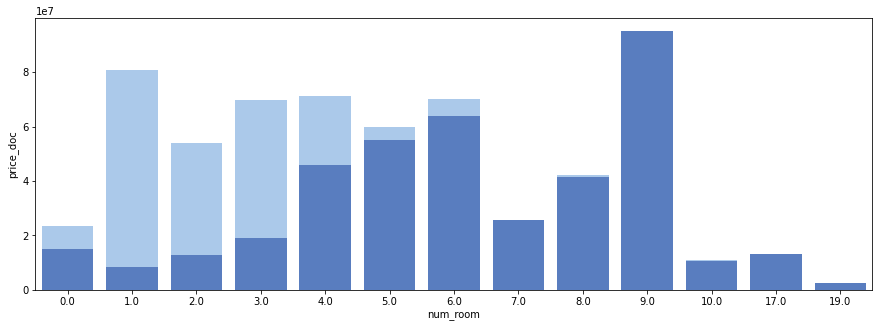

In [299]:
per_num_room_price = df_train.groupby(by=['num_room'])['price_doc'].quantile(.95)
max_num_room_price = df_train.groupby(by=['num_room'])['price_doc'].max()
sns.set_color_codes("pastel")
sns.barplot(x=max_num_room_price.index, y=max_num_room_price, color='b')
sns.set_color_codes("muted")
sns.barplot(x=per_num_room_price.index, y=per_num_room_price, color='b')
plt.show()

Будем считать значение выбросом, если оно больше 95% перцентиля больше чем на одно стандартное отклонение для такого же количества комнат. Подсчитаем количество выбросов для занесения в таблицу и удалим их

In [27]:
count_to_delete = 0

for num in df_train['num_room'].unique():
  group = df_train[df_train['num_room'] == num][['price_doc']]
  max = group.max()['price_doc']
  std = group.std()['price_doc']
  per = group.quantile(.95)['price_doc']
  # print(max)
  while (max - 1 * std) > (per):
    count_to_delete += 1
    idx = group[group['price_doc'] == max].index
    group.drop(idx, inplace=True)
    idx = df_train[(df_train['sub_area'] == district) & (df_train['price_doc'] == max)].index
    for i in range(len(idx)):
      if idx[i] in df_train_clean.index:
        df_train_clean.drop([idx[i]], axis=0, inplace=True)
    max = group.max()['price_doc']
    std = group.std()['price_doc']
    per = group.quantile(.95)['price_doc']

count_to_delete

498

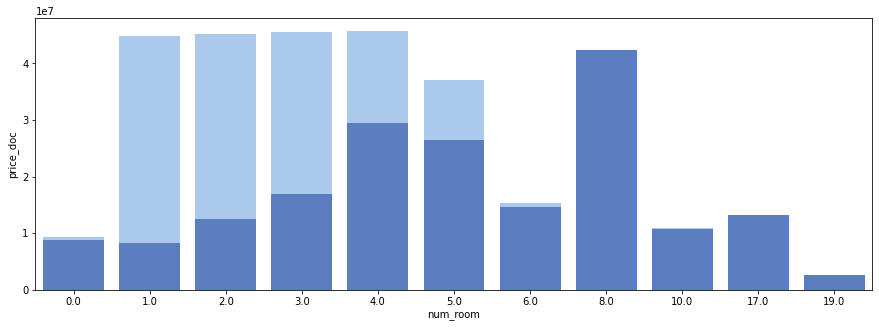

In [30]:
per_num_room_price = df_train_clean.groupby(by=['num_room'])['price_doc'].quantile(.95)
max_num_room_price = df_train_clean.groupby(by=['num_room'])['price_doc'].max()
sns.set_color_codes("pastel")
sns.barplot(x=max_num_room_price.index, y=max_num_room_price, color='b')
sns.set_color_codes("muted")
sns.barplot(x=per_num_room_price.index, y=per_num_room_price, color='b')
plt.show()

In [31]:
df_train_clean['num_room'].value_counts()

2.0     8052
1.0     7576
3.0     4333
4.0      286
5.0       20
0.0       11
6.0        3
10.0       2
19.0       1
17.0       1
8.0        1
Name: num_room, dtype: int64

Теперь мы можем увидеть четкую зависимость между стоимостью недвижимости и количеством комнат. Было бы неплохо, если бы зависимость была линейной (данных при большом количестве комнат слишком мало и мы можем лишь предполагать, каково распределение в области больших значений). Зависимость для 8 комнат и больше совсем не ясна, у нас всего по одной такой квартире

In [32]:
data_cleanup_table.loc[data_cleanup_table['Признак'] == 'num_room', 'Количество выбросов'] = count_to_delete
data_cleanup_table.loc[data_cleanup_table['Признак'] == 'num_room', 'Управление'] = 'Изменим зависимость распределения количества комнат так, чтобы с увеличением значения стоимость возрастала'
data_cleanup_table.loc[data_cleanup_table['Признак'] == 'num_room', 'Комментарий'] = 'Максимальные значения стоимости были слишком далеко от 95%'

data_cleanup_table.loc[data_cleanup_table['Признак'] == 'num_room']

,Признак,Количество пропущенных значений,Количество ошибочных значений,Количество выбросов,Управление,Комментарий
8,num_room,9572,NaN,498,Изменим зависимость распределения количества к...,Максимальные значения стоимости были слишком д...


Сделаем так, чтобы 5-тикомнатные кватриры продавались по максимальной цене, а цена остальных линейно убывала. Для этого создадим новый параметр, являющийся оценкой стоимости по количеству квартир. Например 6-тикомнатная и 4-комнатная стоят примерно одинаково, приравняем 6 к 4, 7 к 3, 8 к 2 и тд

In [33]:
df_train_clean['num_room_max5'] = (5 - (df_train_clean['num_room'] - 5) * (df_train_clean['num_room'] > 5)) * (df_train_clean['num_room'] > 5) + df_train_clean['num_room'] * (df_train_clean['num_room'] <= 5) #значения больше пяти будем вычетать из 5
df_test_clean['num_room_max5'] = (5 - (df_test_clean['num_room'] - 5) * (df_test_clean['num_room'] > 5)) * (df_test_clean['num_room'] > 5) + df_test_clean['num_room'] * (df_test_clean['num_room'] <= 5)
df_train['num_room_max5'] = (5 - (df_train['num_room'] - 5) * (df_train['num_room'] > 5)) * (df_train['num_room'] > 5) + df_train['num_room'] * (df_train['num_room'] <= 5)
df_test['num_room_max5'] = (5 - (df_test['num_room'] - 5) * (df_test['num_room'] > 5)) * (df_test['num_room'] > 5) + df_test['num_room'] * (df_test['num_room'] <= 5)

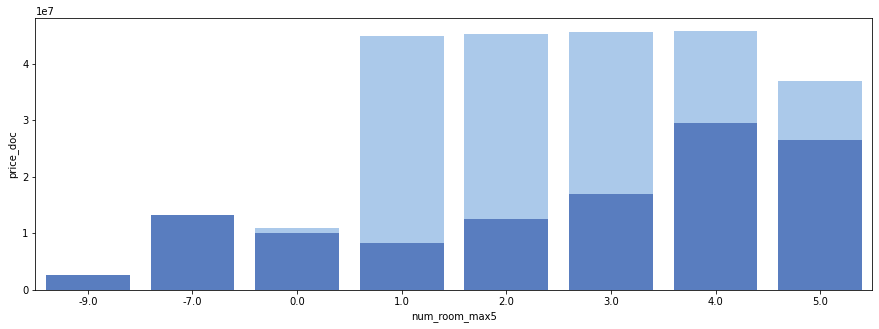

In [35]:
per_num_room_price = df_train_clean.groupby(by=['num_room_max5'])['price_doc'].quantile(.95)
max_num_room_price = df_train_clean.groupby(by=['num_room_max5'])['price_doc'].max()
sns.set_color_codes("pastel")
sns.barplot(x=max_num_room_price.index, y=max_num_room_price, color='b')
sns.set_color_codes("muted")
sns.barplot(x=per_num_room_price.index, y=per_num_room_price, color='b')
plt.show()

Получилась более-менее линейная зависимость. На всякий случай посмотрим на тестовые данные:

In [38]:
df_test_clean['num_room_max5'].value_counts()

 2    3097
 1    2855
 3    1556
 4     134
 5      19
-9       1
Name: num_room_max5, dtype: int64

Оказалось, что в обучающем наборе есть нулевые значения, а в тестовом нет. Удалим нулевые значения

In [87]:
df_train[['num_room']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   num_room  20899 non-null  float64
dtypes: float64(1)
memory usage: 238.2 KB


In [88]:
df_train['num_room'].isna().sum()

9572

In [89]:
data_cleanup_table.loc[data_cleanup_table['Признак'] == 'num_room', 'Количество ошибочных значений'] = df_train['num_room'].isna().sum()

In [98]:
to_delete = df_train_clean[df_train_clean['num_room'].isna()].index
df_train_clean.drop(to_delete, axis=0, inplace=True)

----

### Информация о метро

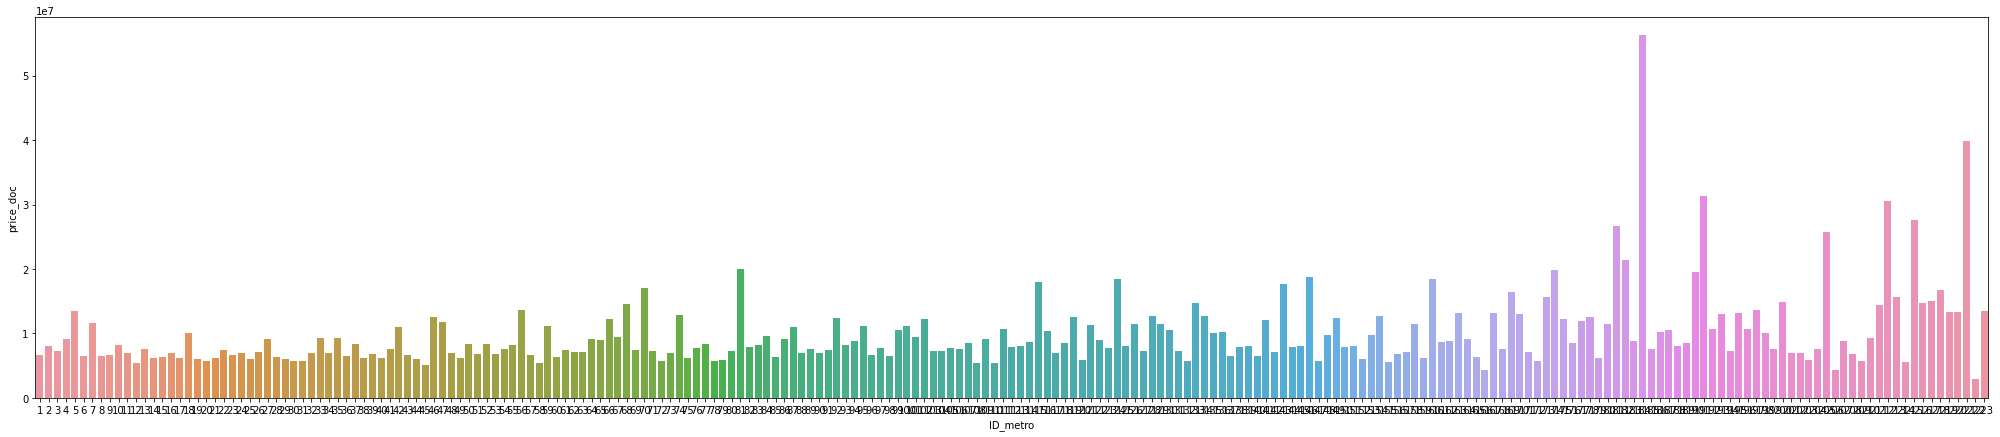

In [44]:
pylab.rcParams['figure.figsize'] = (35, 7)

mean_metro_price = df_train.groupby(by=['ID_metro'])['price_doc'].mean()
sns.barplot(x=mean_metro_price.index, y=mean_metro_price)
plt.show()

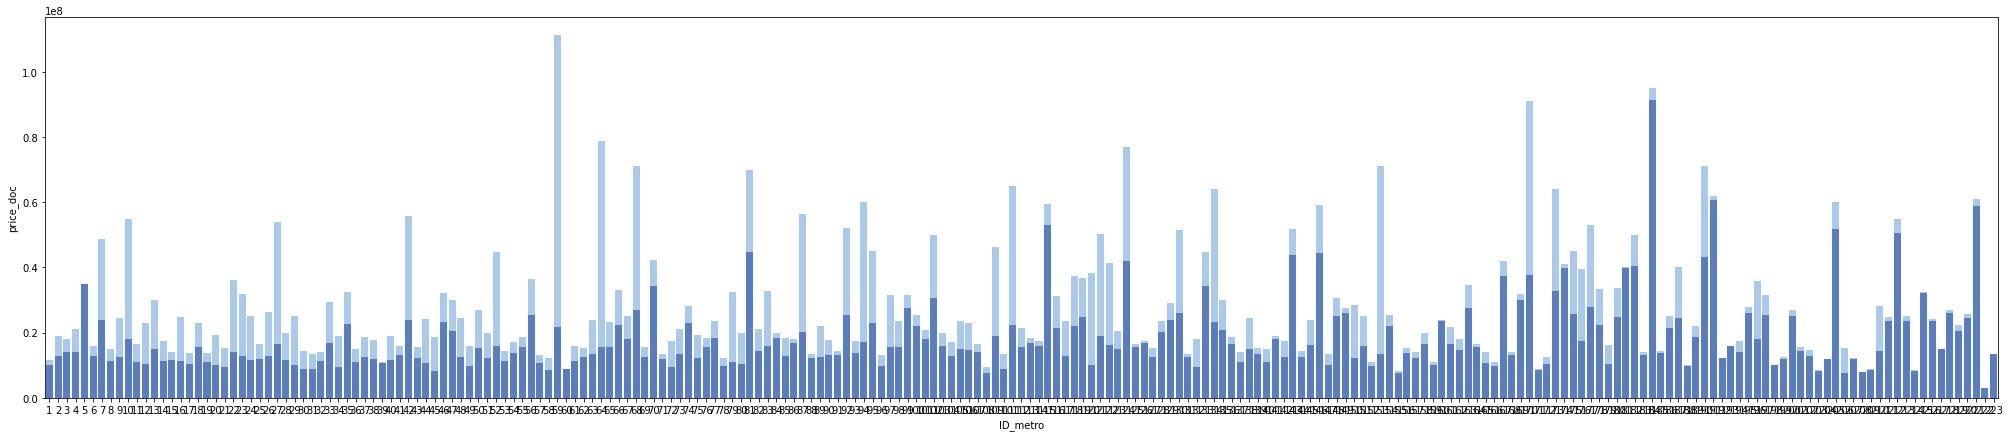

In [53]:
per_metro_price = df_train.groupby(by=['ID_metro'])['price_doc'].quantile(.95)
max_metro_price = df_train.groupby(by=['ID_metro'])['price_doc'].max()
sns.set_color_codes("pastel")
sns.barplot(x=max_metro_price.index, y=max_metro_price, color='b')
sns.set_color_codes("muted")
sns.barplot(x=per_metro_price.index, y=per_metro_price, color='b')
plt.show()

Разброс не так уж и велик. Разделим станции метро на два класса: обычные и повышающие стоимость жилья

In [64]:
rang = mean_metro_price.max() / 7
metro_groups_reverse = {}
metro_groups_reverse[0] = mean_metro_price[mean_metro_price < rang].index
metro_groups_reverse[1] = mean_metro_price[mean_metro_price >= rang].index
print(len(metro_groups_reverse[0]))
print(len(metro_groups_reverse[1]))

108
115


In [65]:
metro_groups={}
for i in range(len(metro_groups_reverse)):
  for j in metro_groups_reverse[i]:
    metro_groups[j] = i

In [72]:
metro_groups[223]

1

In [75]:
df_test_clean.loc[df_test_clean['ID_metro'] == 224, 'ID_metro'] = 223 # В тестовых данных попалась новая станция. Будем считать что либо это ошибка, либо станция 224 рядом с 223

In [76]:
df_train_clean['metro_class'] = [metro_groups[i] for i in df_train_clean['ID_metro']]
df_test_clean['metro_class'] = [metro_groups[i] for i in df_test_clean['ID_metro']]

In [77]:
data_cleanup_table.loc[data_cleanup_table['Признак'] == 'ID_metro', 'Количество выбросов'] = 0
data_cleanup_table.loc[data_cleanup_table['Признак'] == 'ID_metro', 'Управление'] = 'Поделили на 2 класса'
data_cleanup_table.loc[data_cleanup_table['Признак'] == 'ID_metro', 'Комментарий'] = 'Заменили новым признаком metro_class'

data_cleanup_table.loc[data_cleanup_table['Признак'] == 'ID_metro']

,Признак,Количество пропущенных значений,Количество ошибочных значений,Количество выбросов,Управление,Комментарий
84,ID_metro,0,NaN,0,Поделили на 2 класса,Заменили новым признаком metro_class


----

# Линейная регрессия

Мы успели очистить только три признака, по ним и будем строить регрессию:
- raion_range
- num_room_max5
- metro_class

Остальные данные в обучении участвовать не будут, считаем удаленными

In [79]:
df_train_clean[]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,raion_range,num_room_max5,metro_class
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,13,22,1,0,52,4,5850000,2,NaN,0
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,29,1,10,66,14,6000000,4,NaN,1
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,11,27,0,4,67,10,5700000,2,NaN,0
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,4,4,0,0,26,3,13100000,4,NaN,1
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,135,236,2,91,195,14,16331452,5,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30465,30468,2015-06-30,52,NaN,13.0,17.0,1.0,NaN,2.0,1.0,...,150,249,2,105,203,13,6750554,3,2.0,0
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,15,26,1,2,84,6,7400000,3,2.0,0
30468,30471,2015-06-30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,...,2,12,0,1,11,1,6970959,2,1.0,0
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,6,31,1,4,65,7,13500000,5,2.0,1


In [100]:
X = df_train_clean[['raion_range', 'num_room_max5', 'metro_class']].values
y = df_train_clean['price_doc'].values

In [103]:
X.shape

(20286, 3)

In [104]:
y.shape

(20286,)

0.4094358776449325 0.41673815474677345
7028024.55803865 [1207568.31719349 1505424.82652372  513887.63829788]


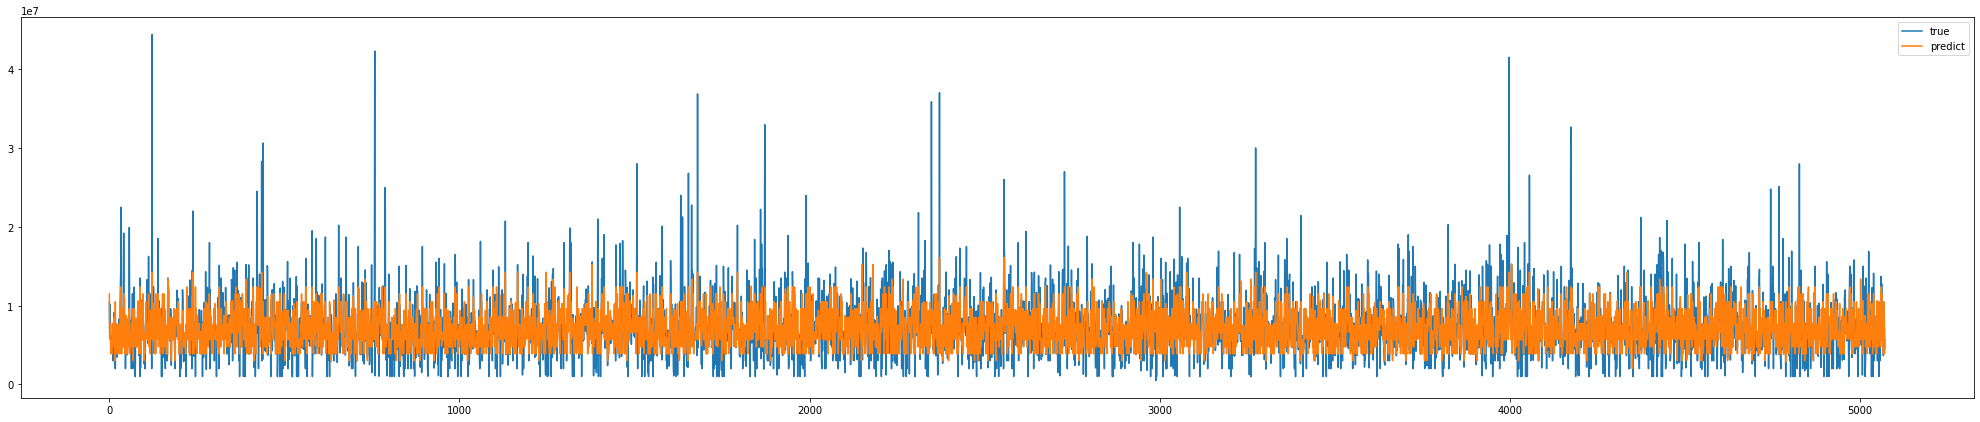

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

def lin_reg(y, X):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)
  sc = StandardScaler()
  sc.fit(X_train)
  X_train_std = sc.transform(X_train)
  X_test_std = sc.transform(X_test)
  lr = LinearRegression()
  lr.fit(X_train_std, y_train)
  y_pred = lr.predict(X_test_std)
  print(lr.score(X, y),lr.score(X_test, y_test))
  print(lr.intercept_, lr.coef_)
  plt.plot(range(len(y_test)), y_test)
  plt.plot(range(len(y_test)), lr.predict(X_test))
  plt.legend(['true', 'predict'])
  plt.plot()
  # print(classification_report(y_test, y_pred))
  return sc, lr

X = df_train_clean[['raion_range', 'num_room_max5', 'metro_class']].values
X = (X - X.mean(axis=0)) / X.std(axis=0)
y = df_train_clean['price_doc'].values
sc, lr = lin_reg(y, X)

Получили, что модель объясняет 40% дисперсии на обучающей и 41% на тестовой выборке